# Автокорреляция рядов ожидаемой продолжительности жизни по странам

In [1]:
import sys
# Добавим папку с корнем проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf

from utils.constants import (
    F, 
)
from utils.prepare_data import (
    get_location_time_series,
    get_location_by_code,
    get_train_test_data,
    get_integration_order,
)

%matplotlib inline

from warnings import simplefilter
simplefilter('ignore')

In [3]:
# Загрузим таблицу
data = pd.read_csv(
    '../data/cumulative_life_expectancy_prepared.csv'
)

> **Автокорреляция** — это статистическая взаимосвязь \
между последовательностями значений одного временного ряда, взятыми со сдвигом. \
Другими словами, автокорреляция говорит нам о том, насколько значение во временном ряду \
похоже на предыдущее значение.

Посмотрим на графики автокорреляции рядов с ожидаемой продолжительностью жизни для разных стран.

In [4]:
# Загрузим данные с порядком интегрирования рядов, который посчитали ранее
integration_order_data = pd.read_csv(
    '../data/integration_order.csv'
)
integration_order_data.head()

SpatialDimValueCode  IntegrationOrder
0                 AGO                 1
1                 BDI                 1
2                 BEN                 1
3                 BFA                 1
4                 BWA                 1

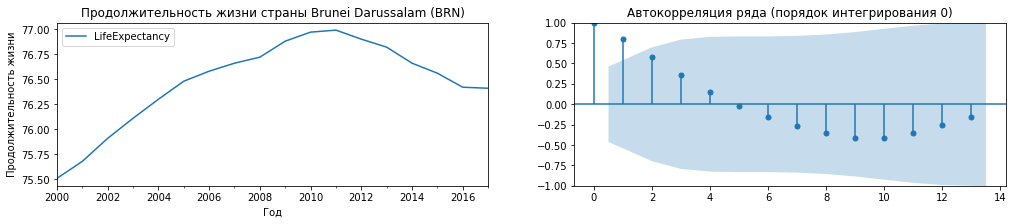

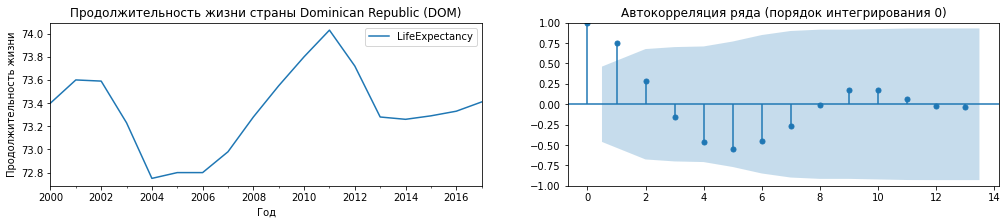

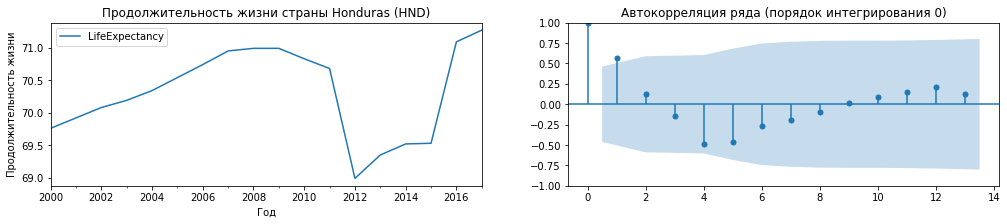

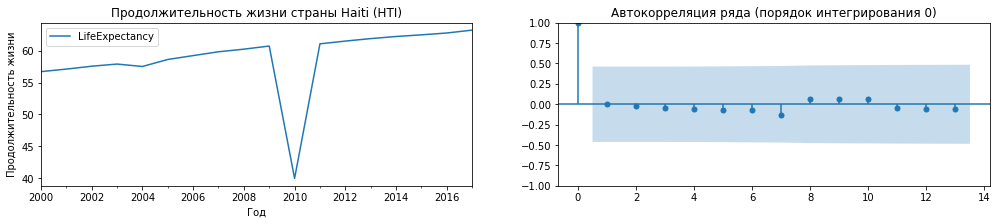

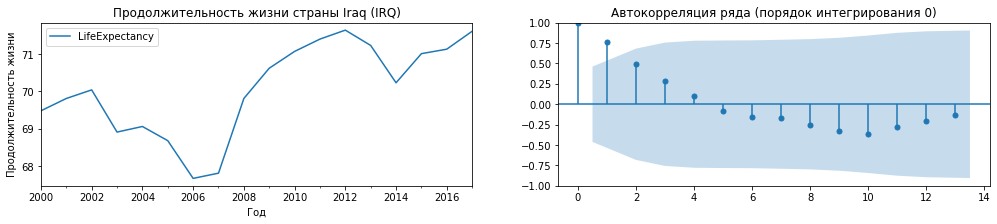

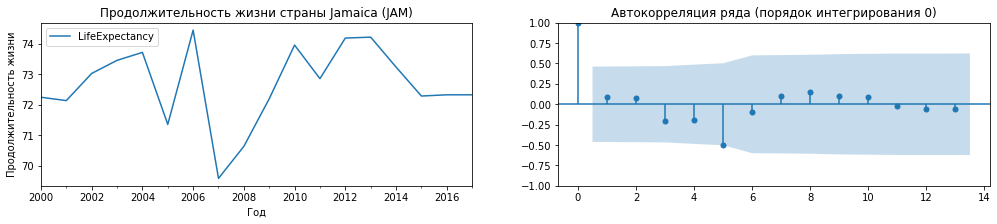

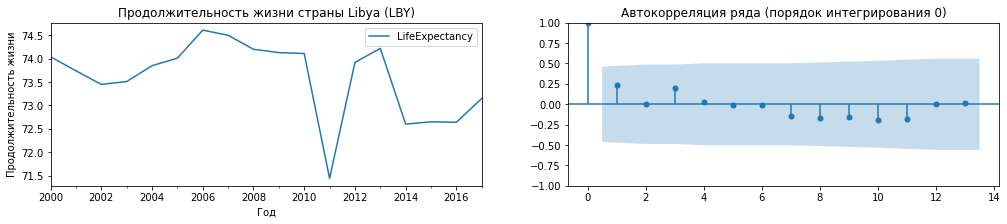

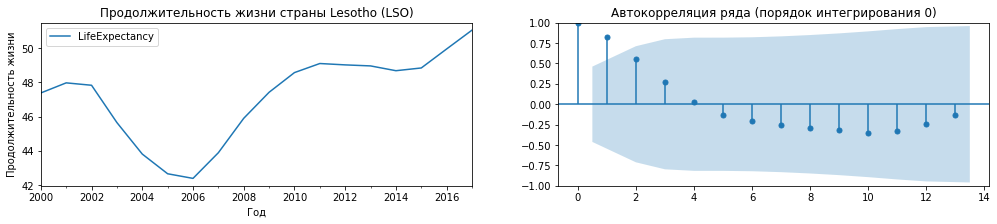

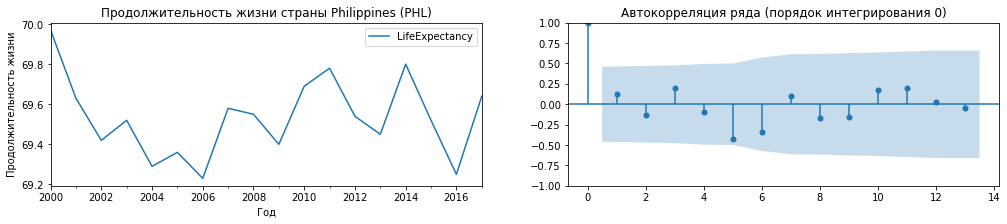

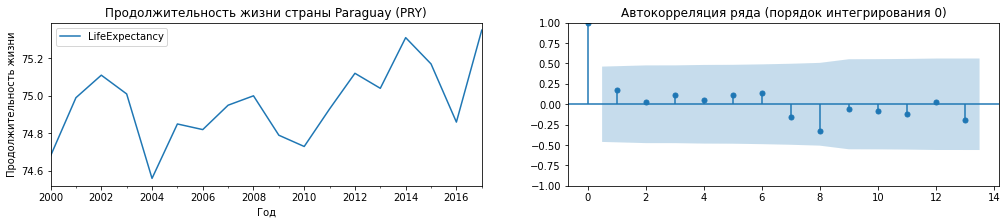

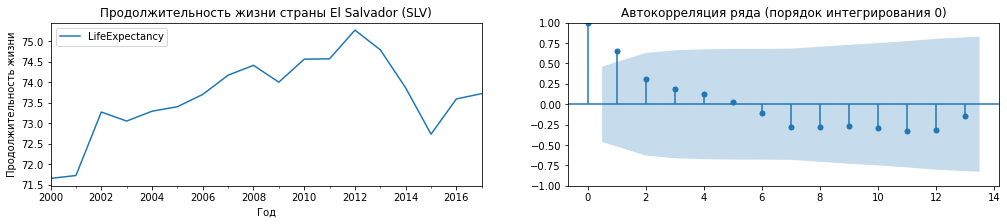

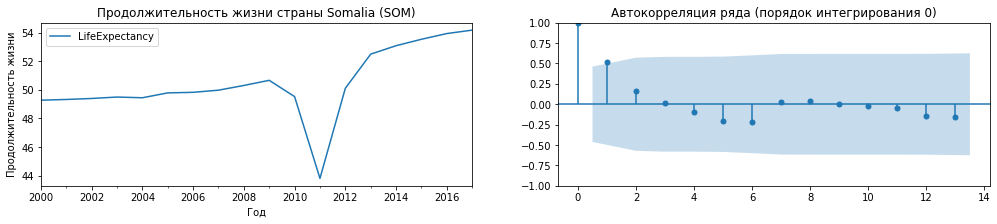

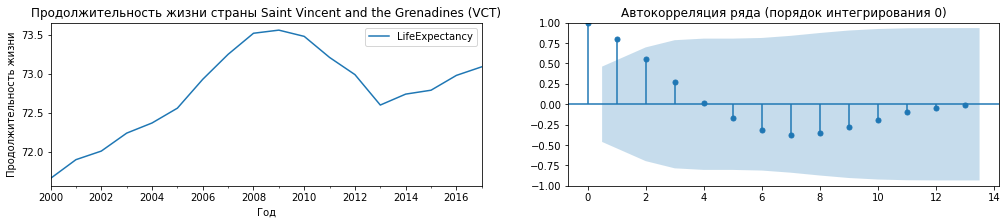

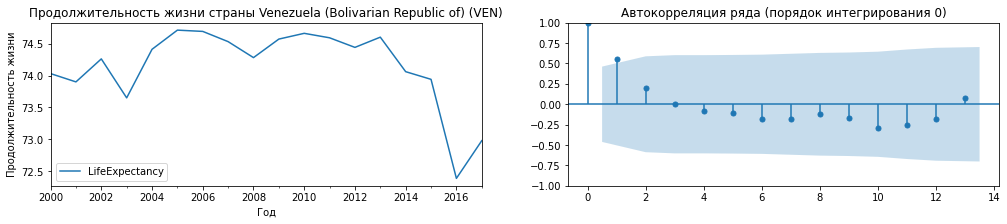

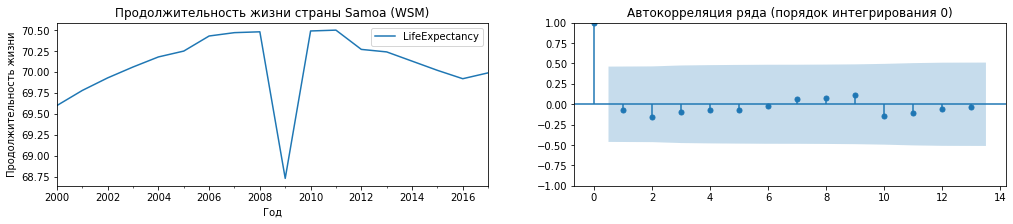

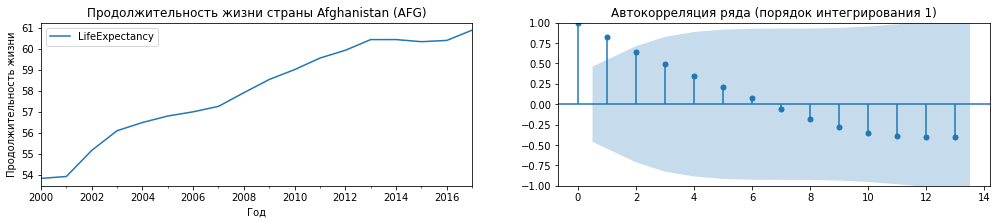

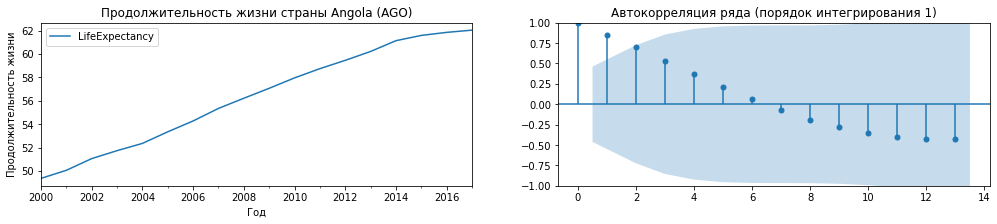

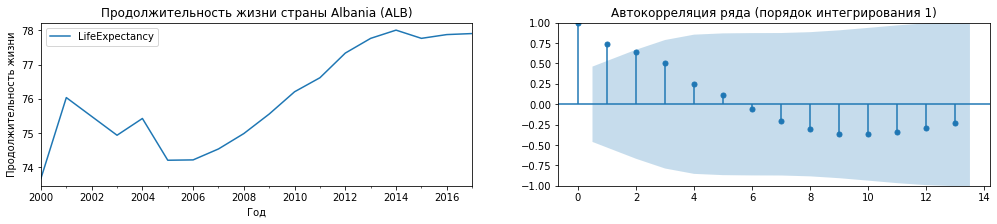

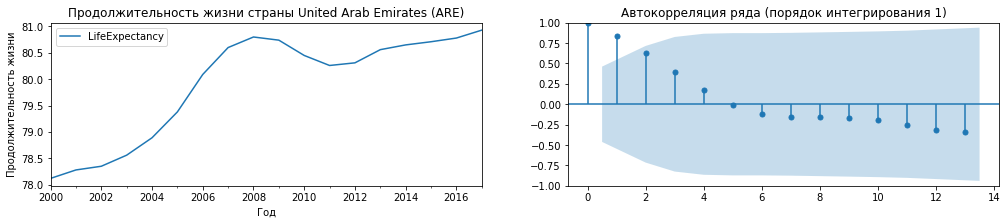

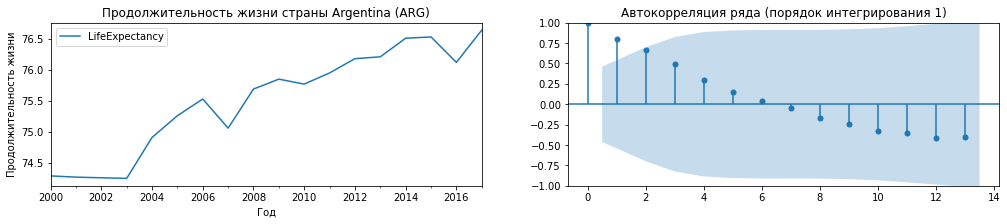

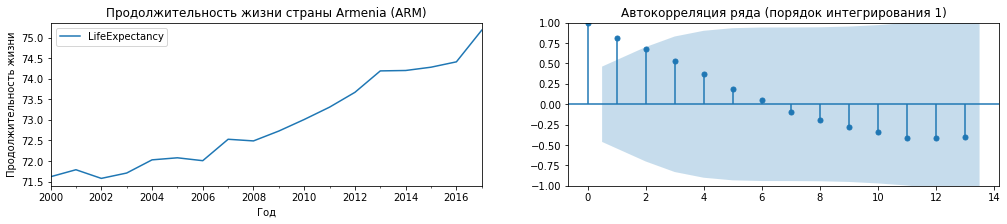

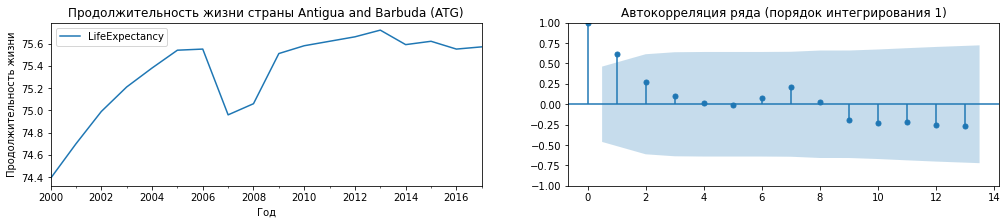

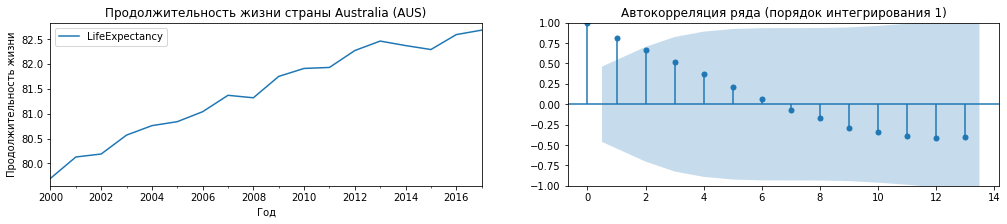

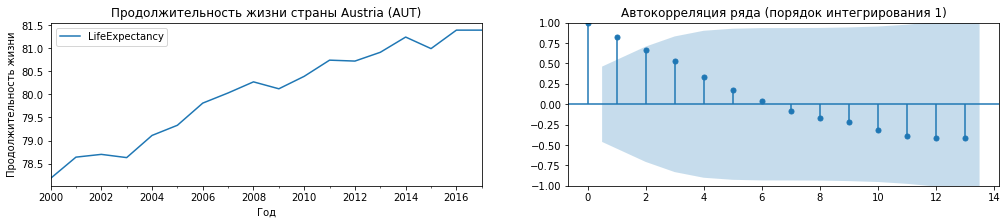

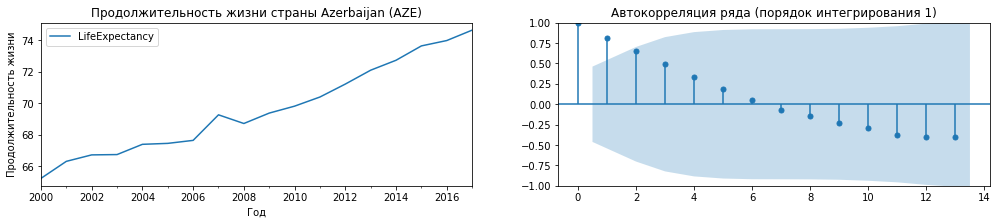

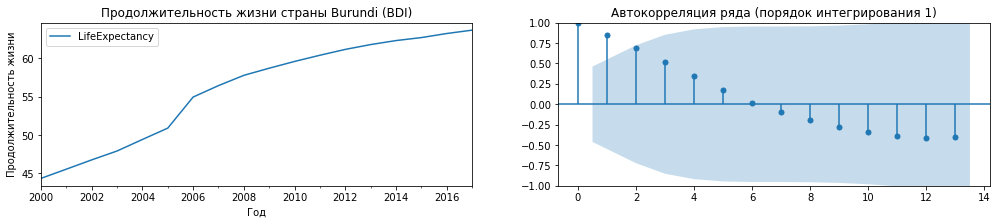

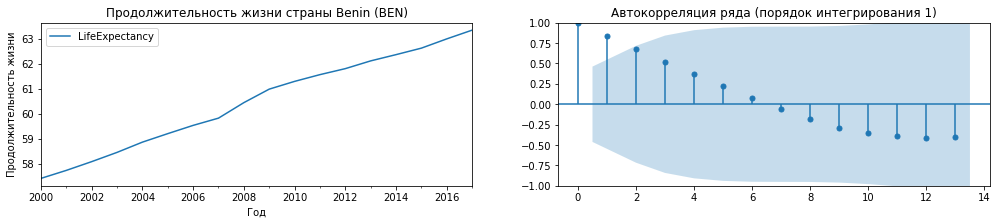

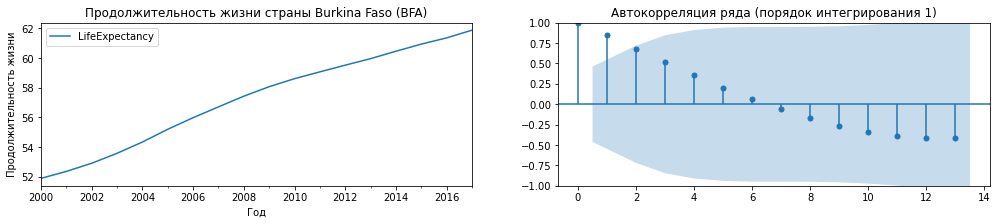

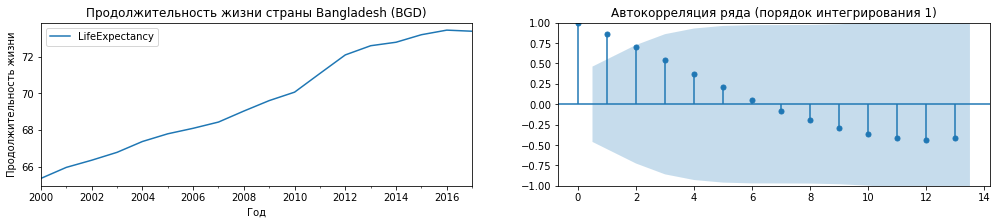

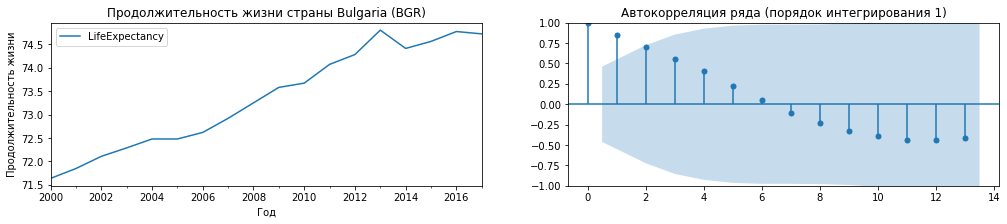

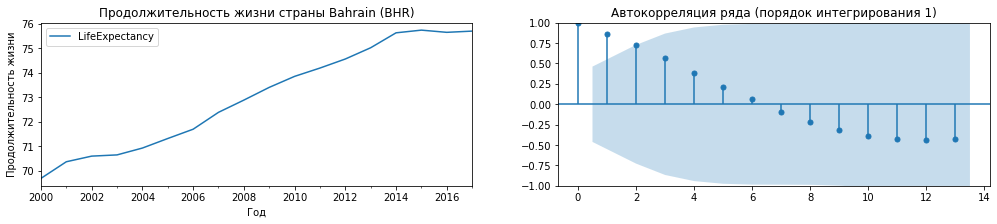

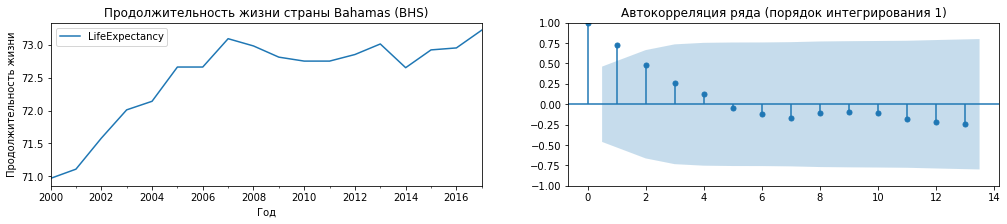

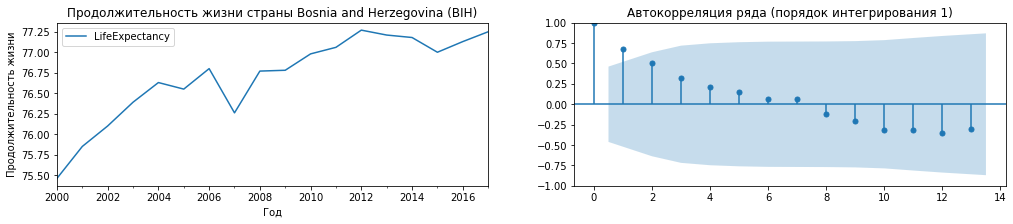

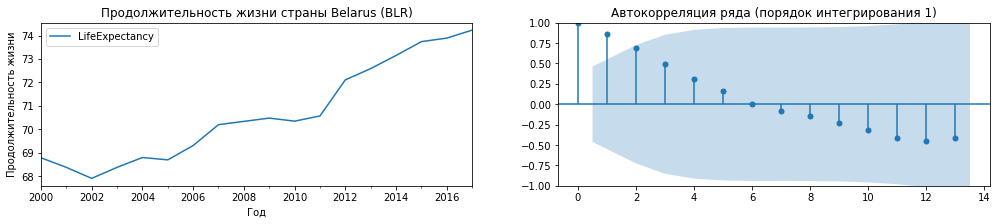

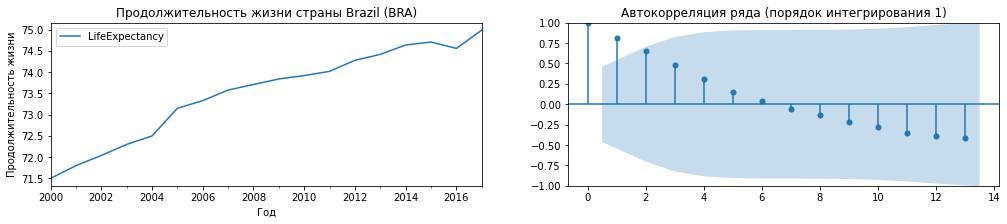

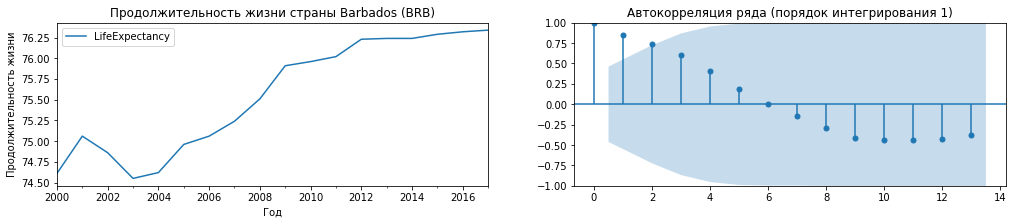

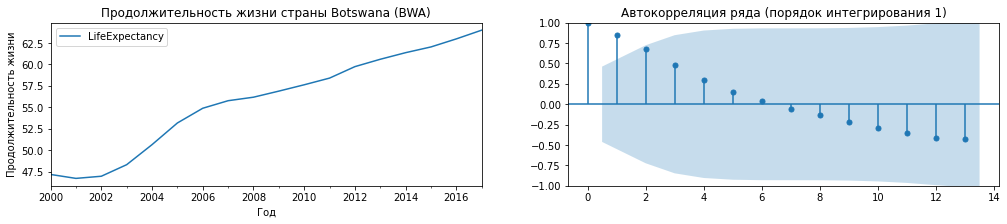

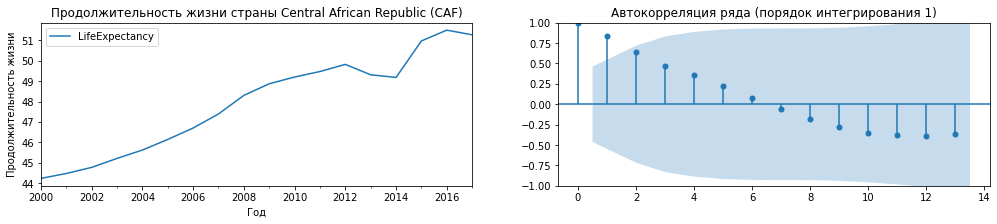

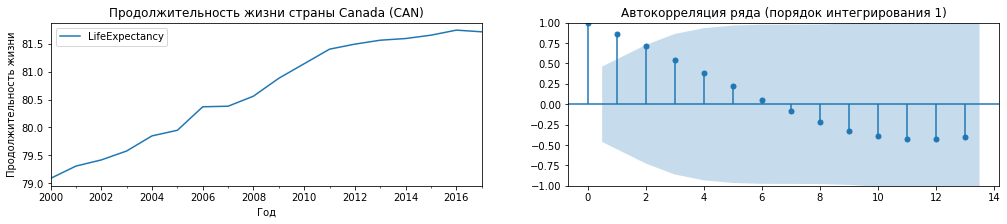

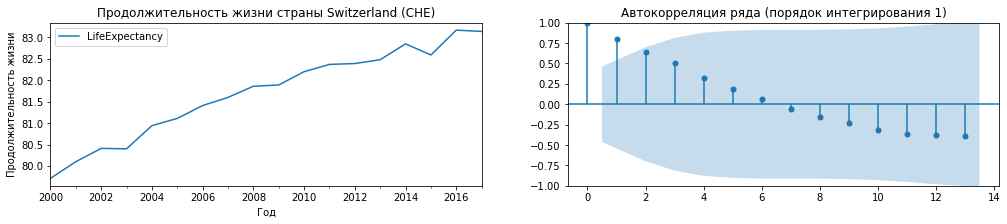

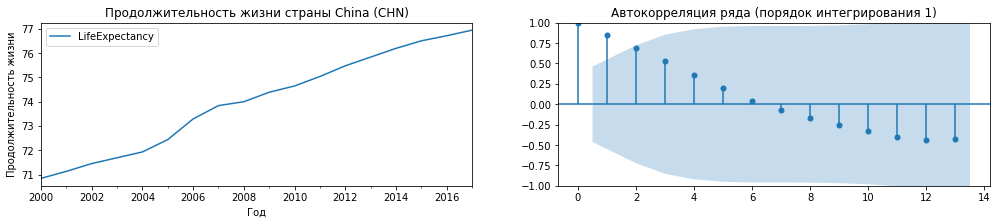

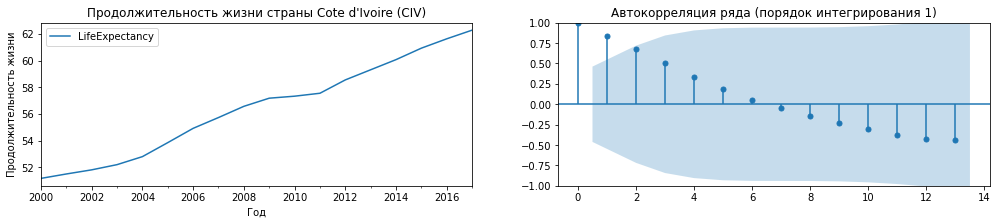

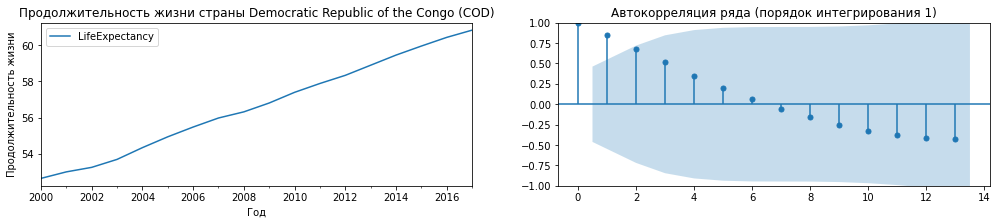

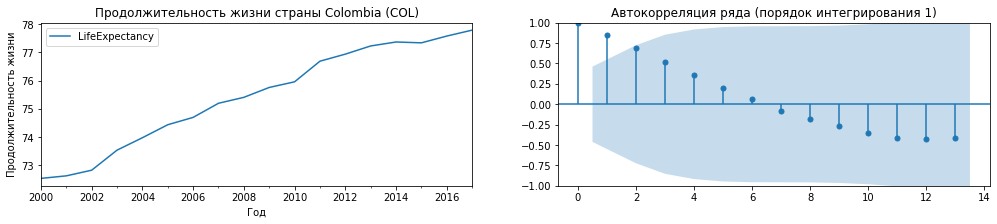

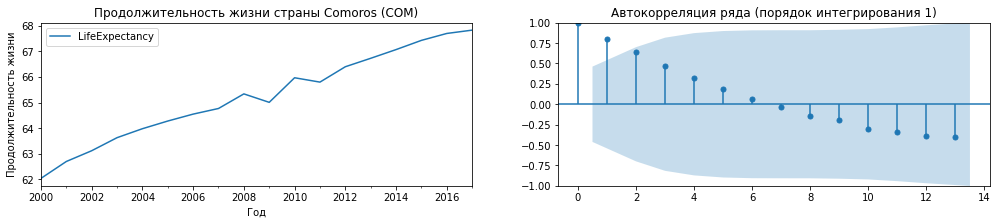

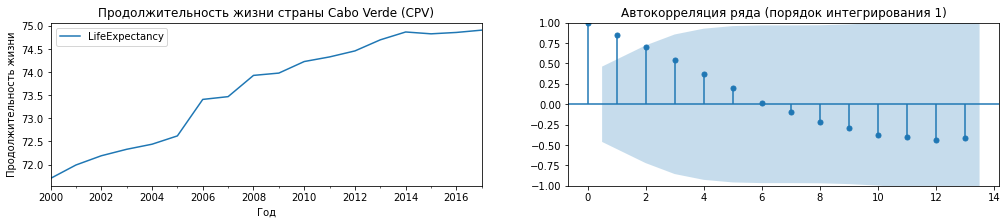

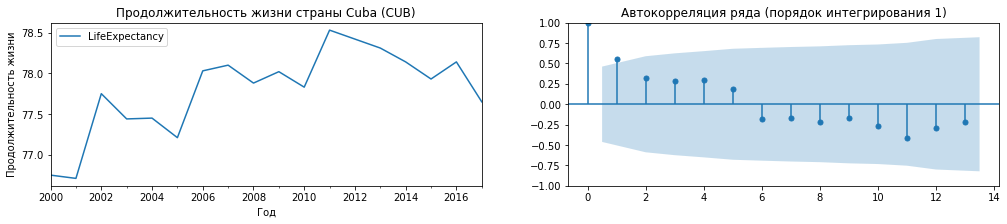

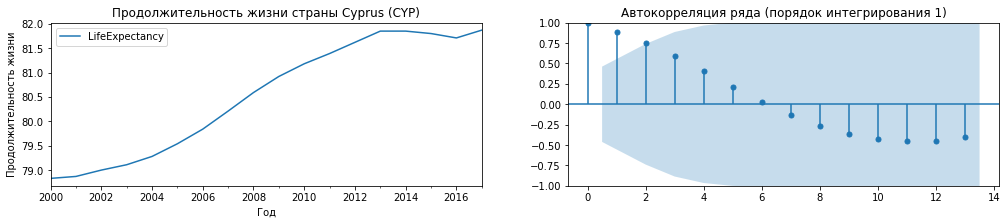

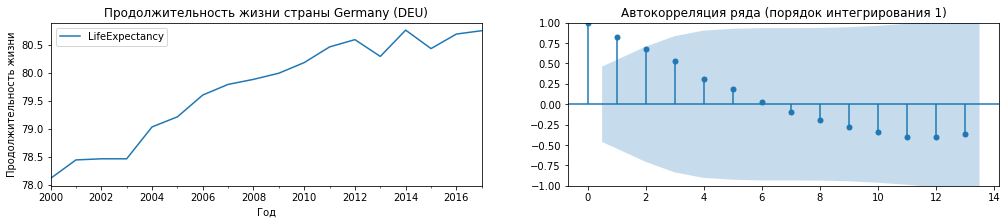

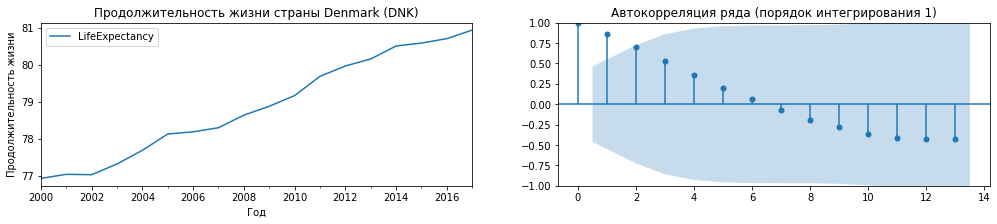

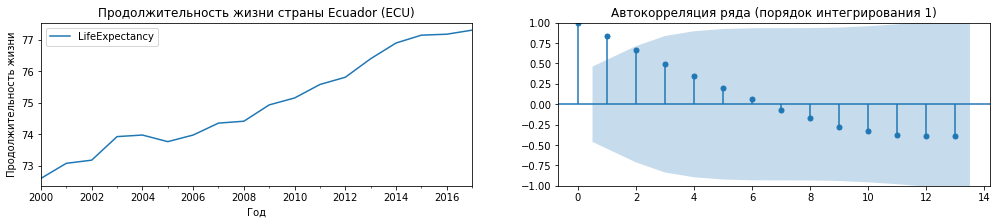

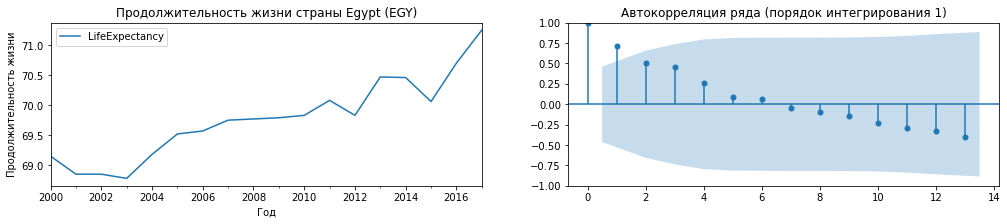

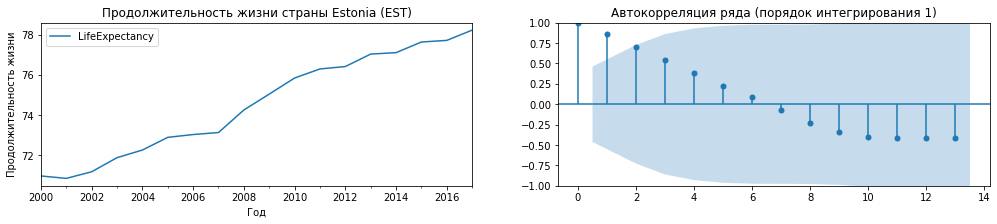

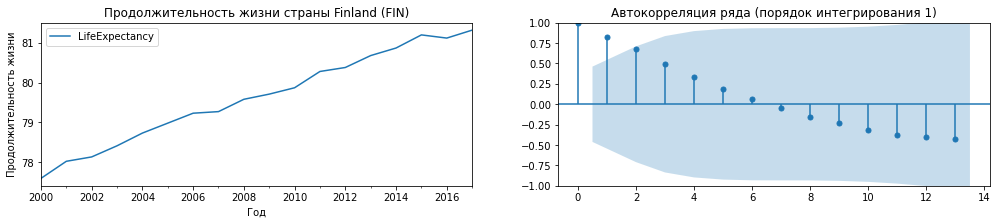

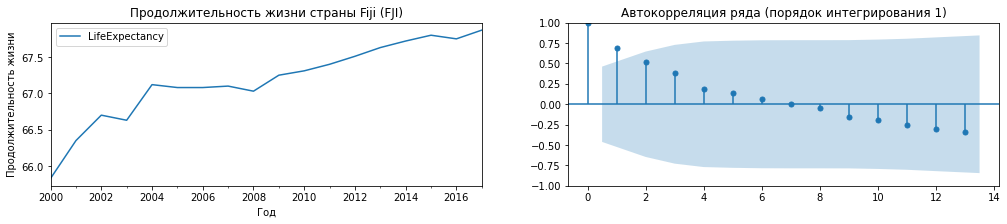

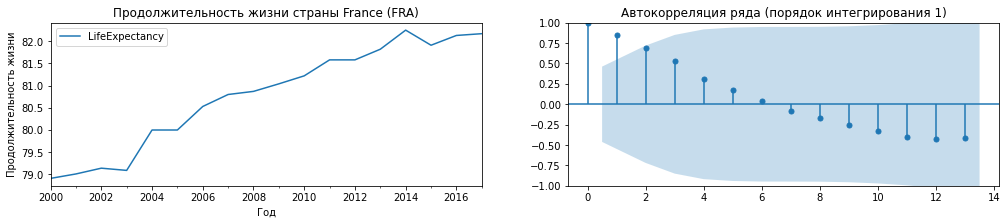

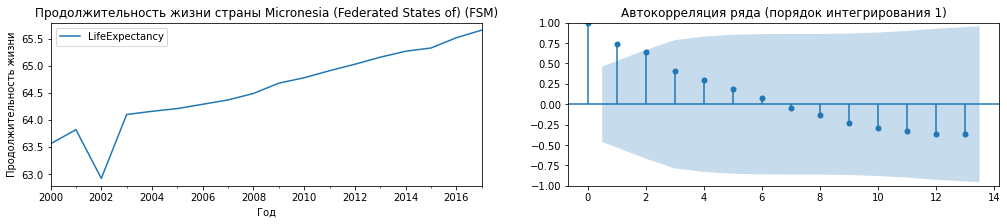

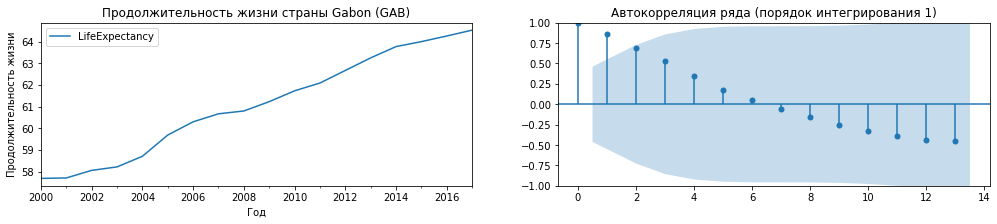

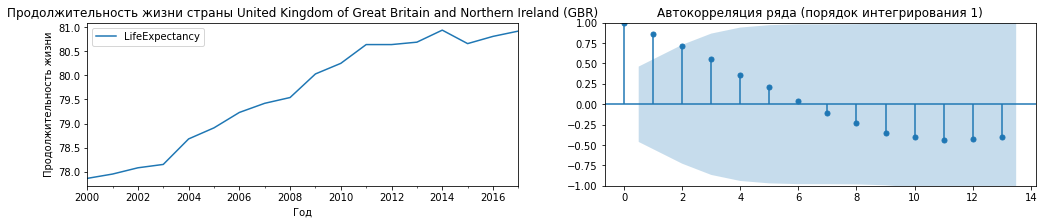

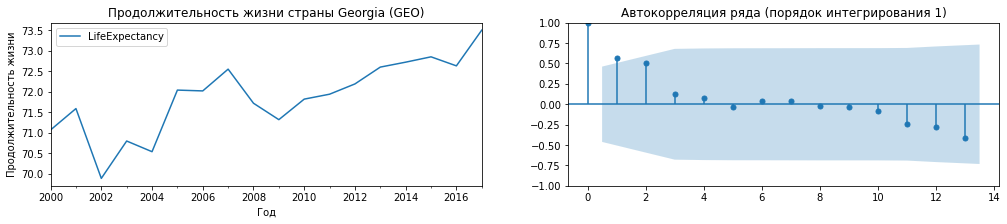

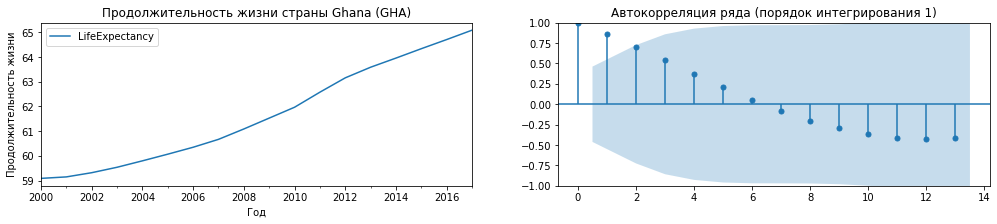

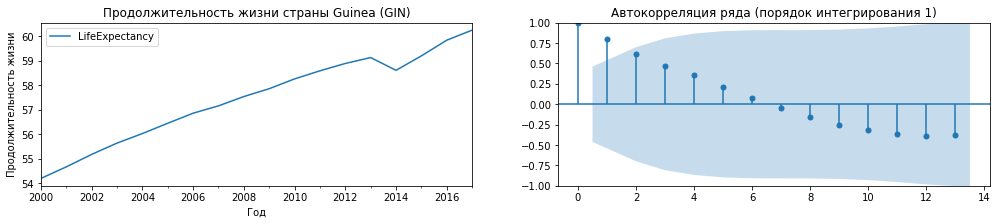

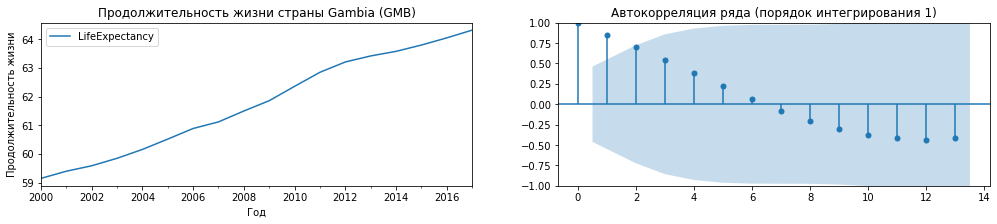

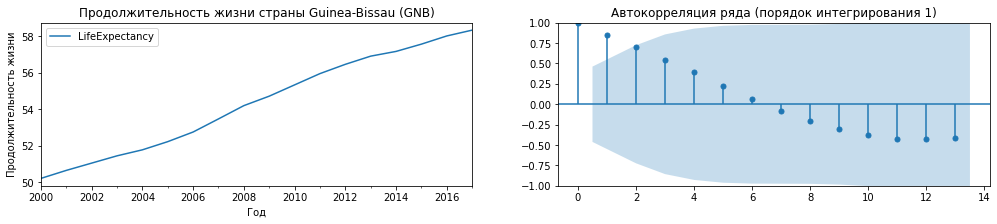

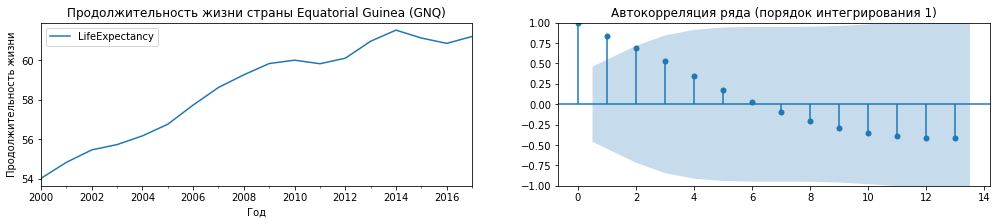

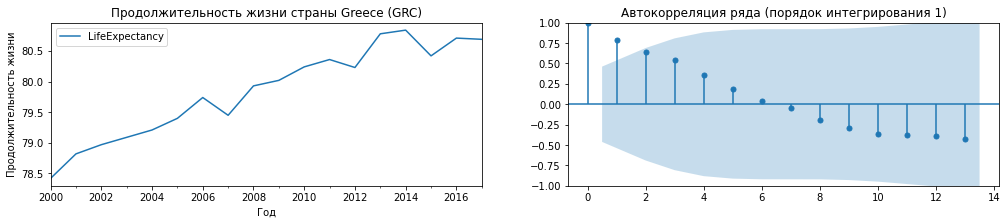

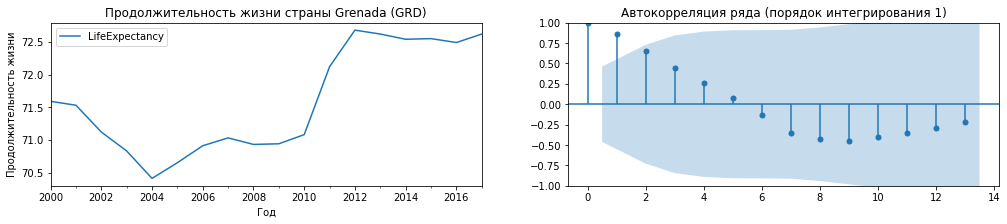

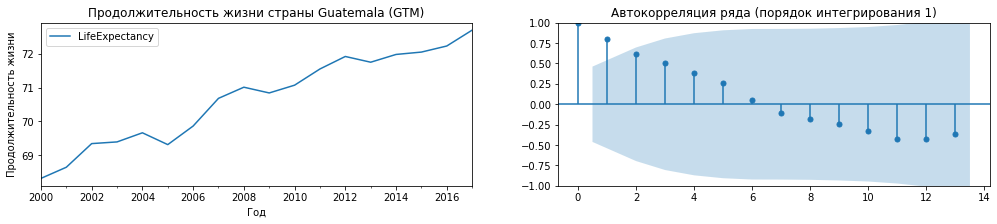

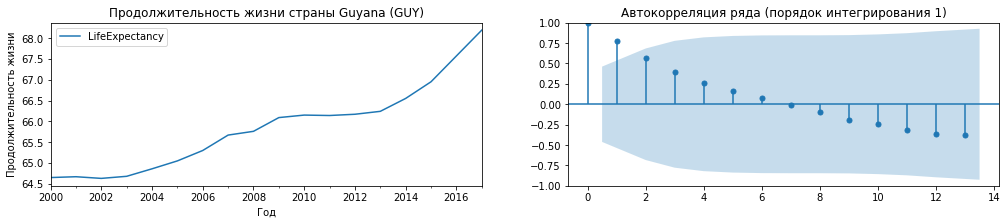

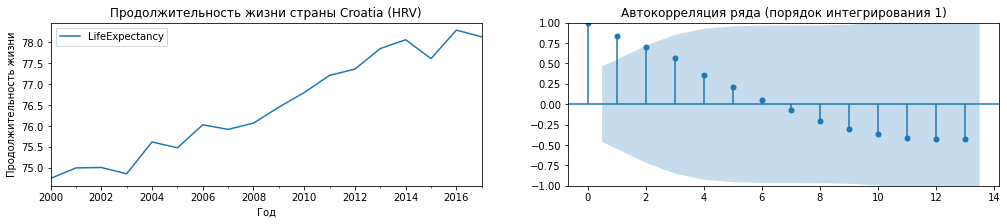

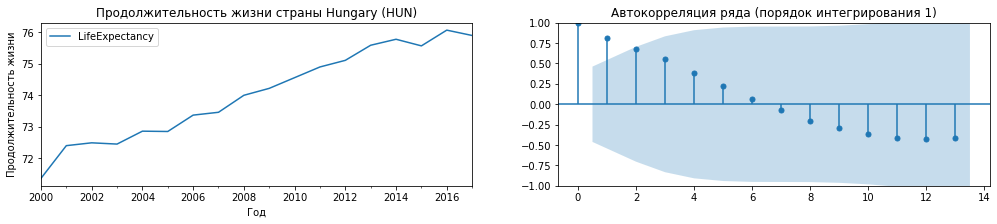

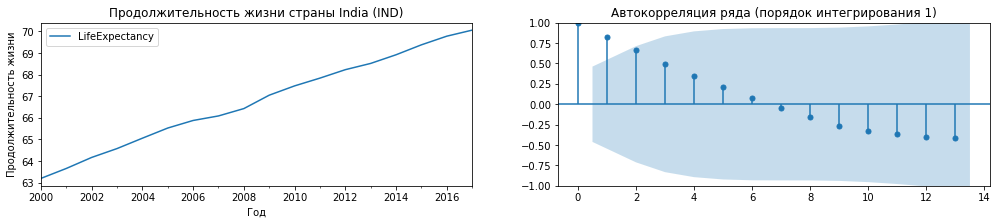

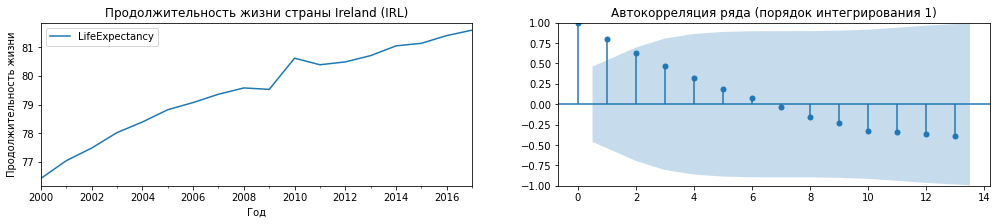

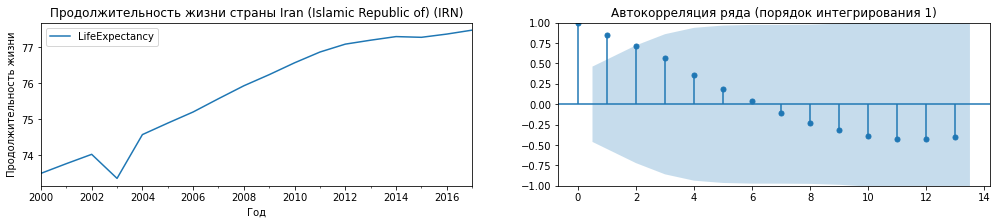

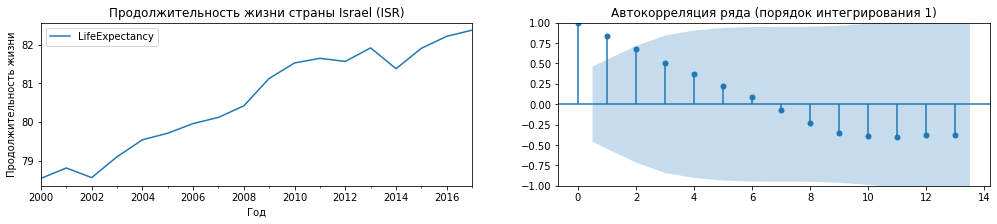

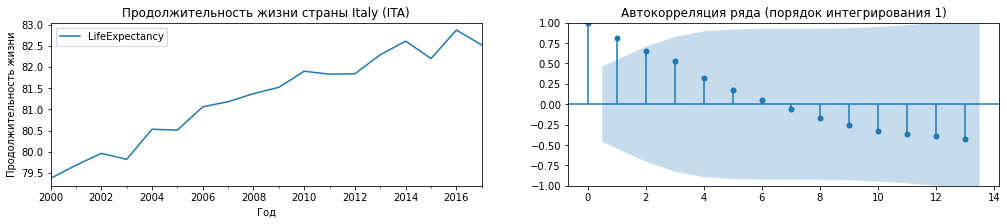

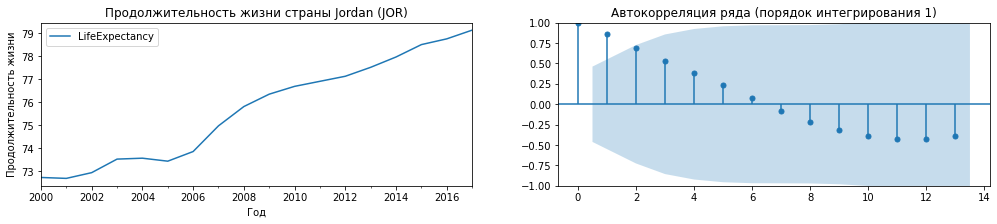

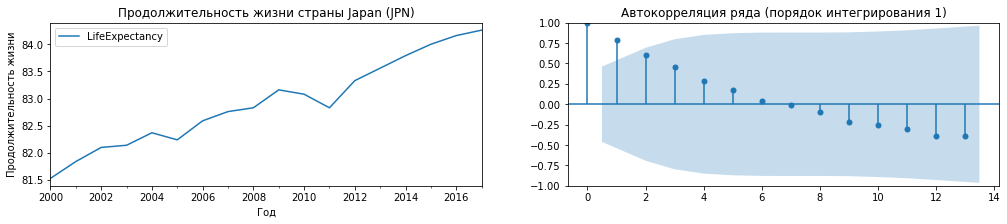

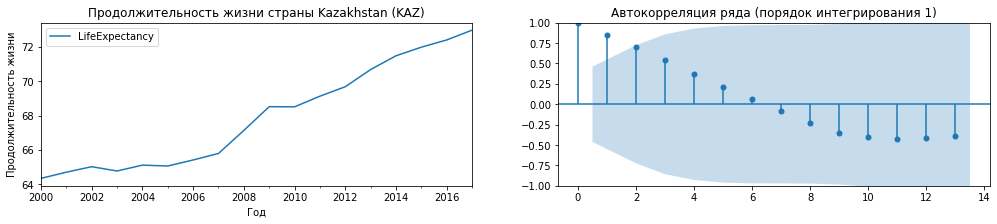

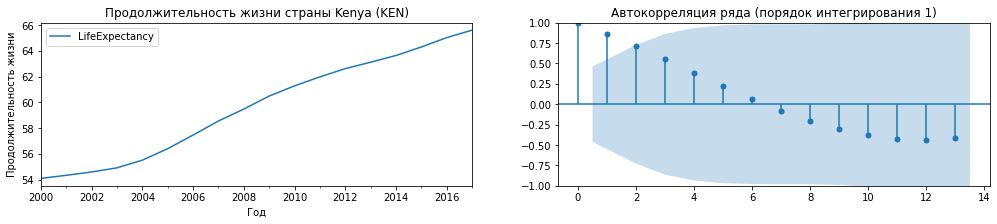

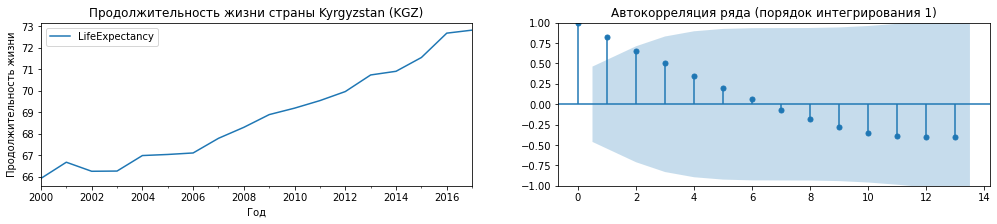

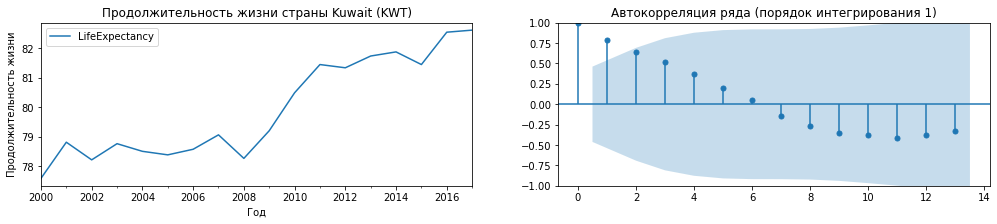

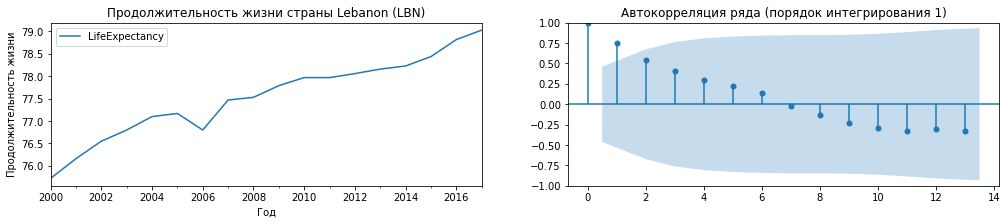

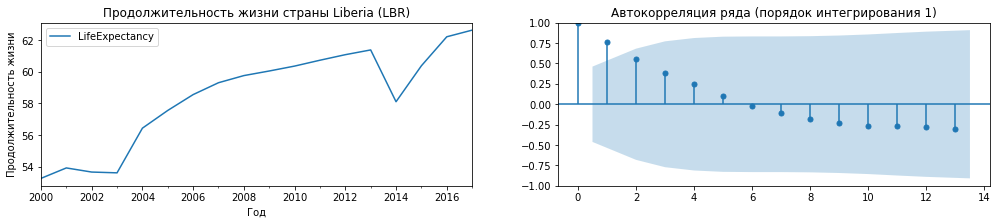

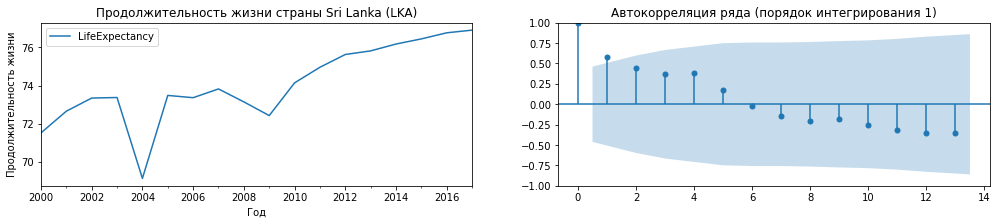

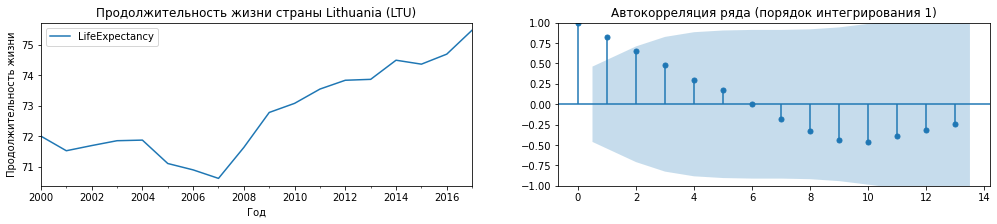

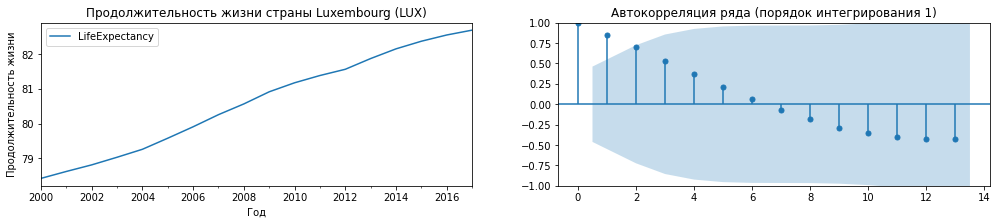

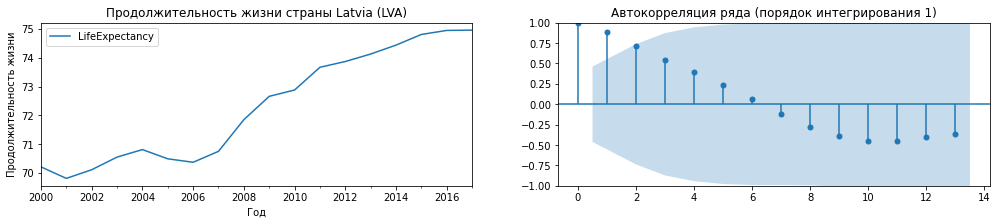

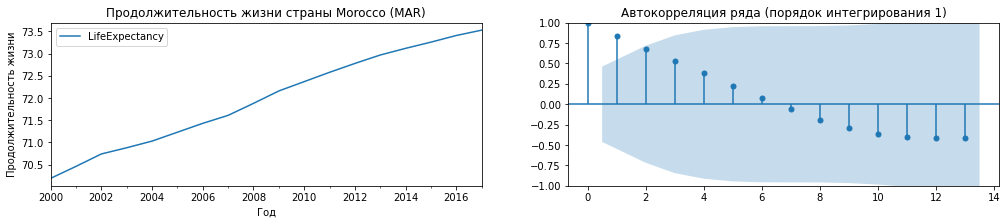

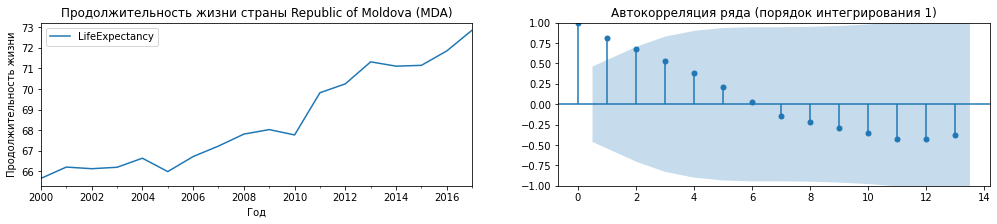

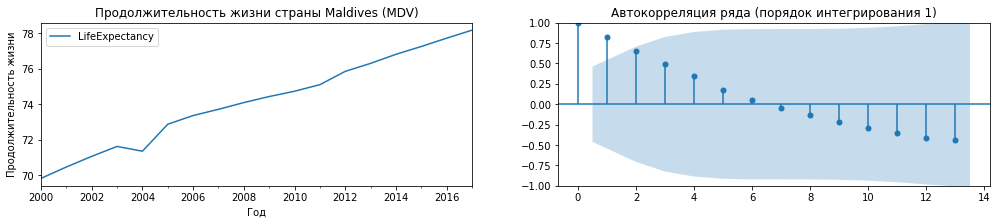

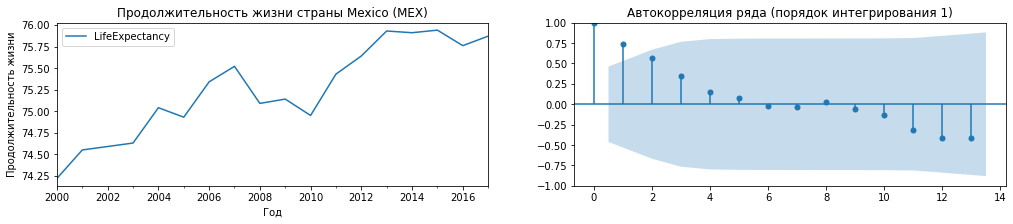

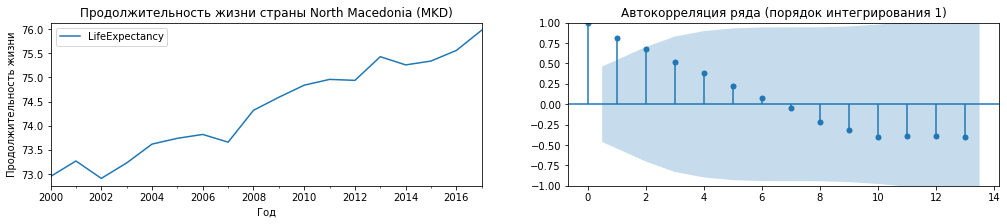

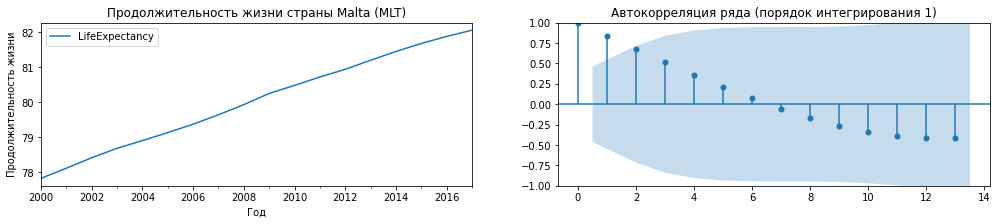

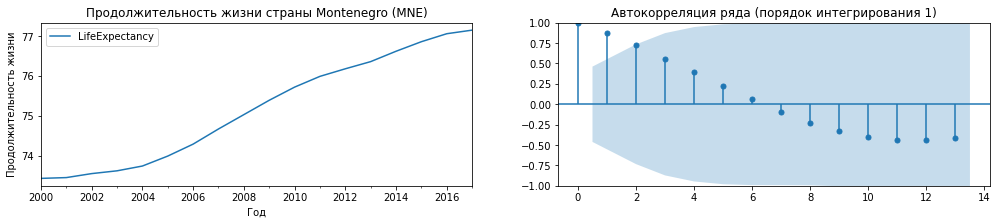

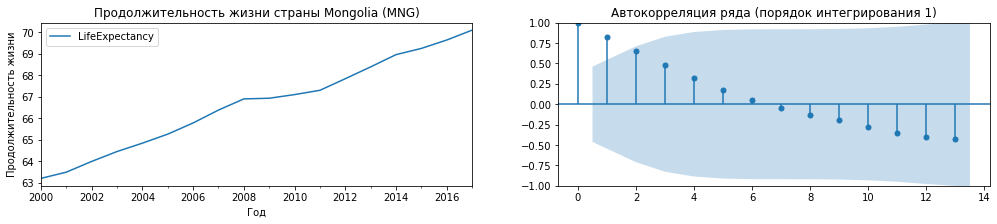

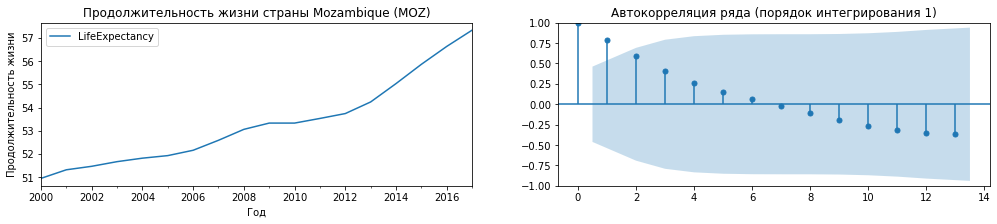

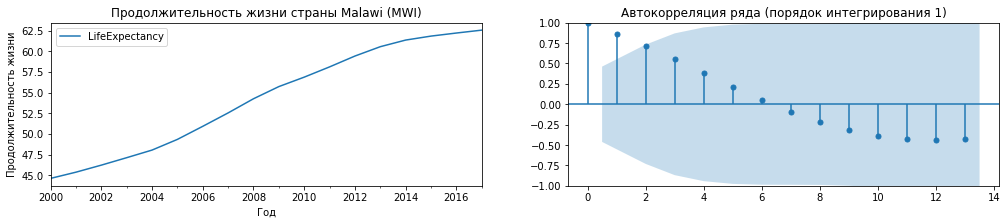

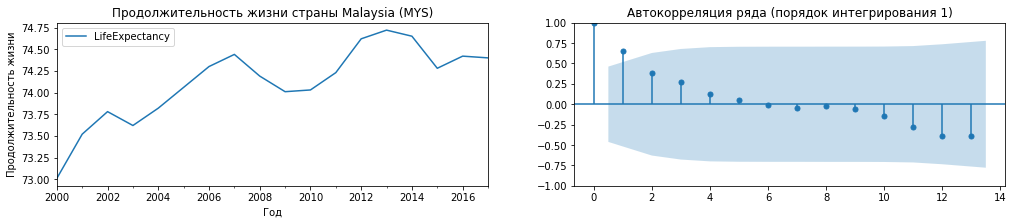

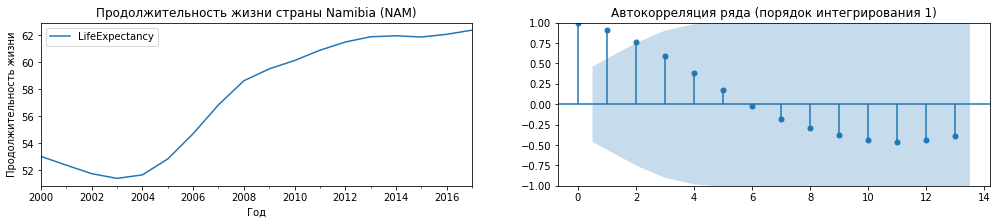

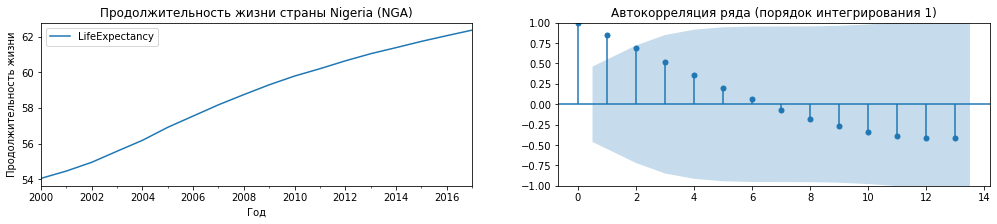

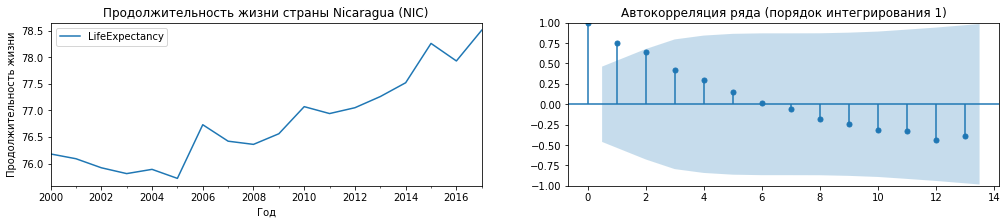

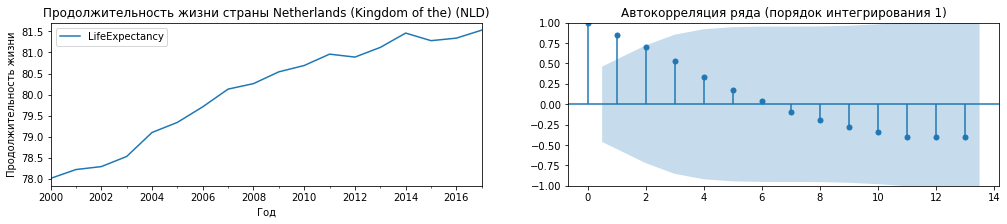

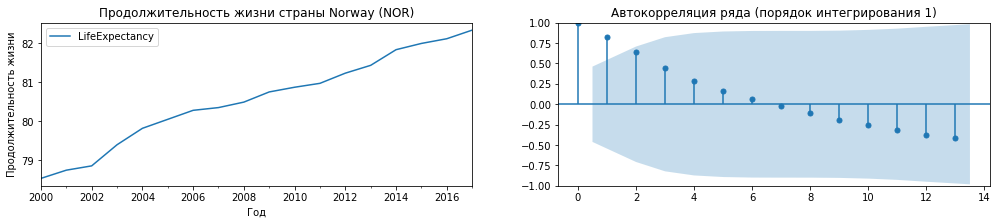

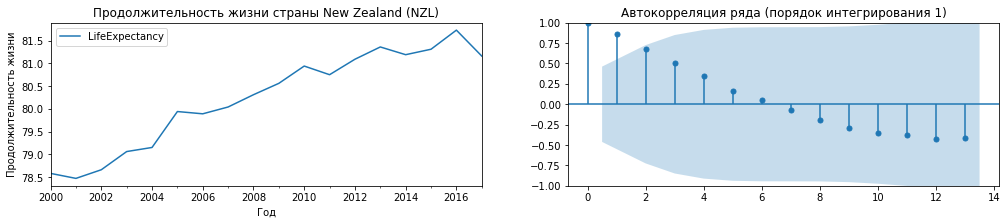

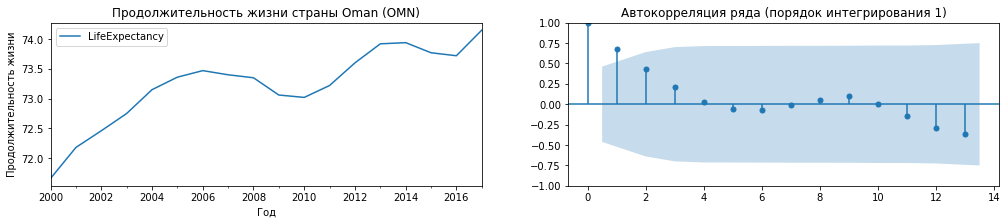

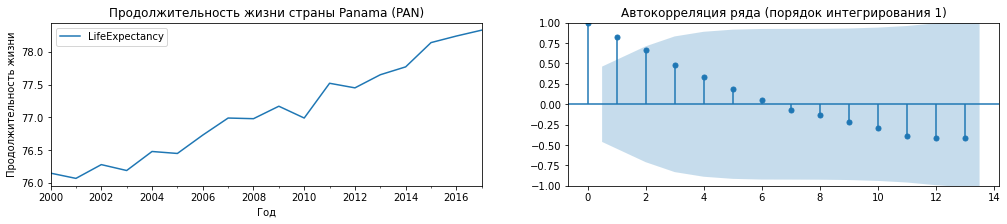

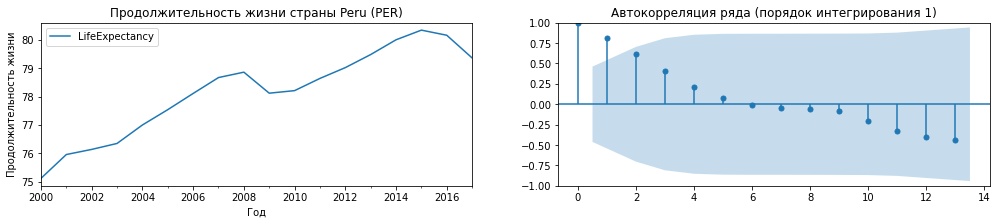

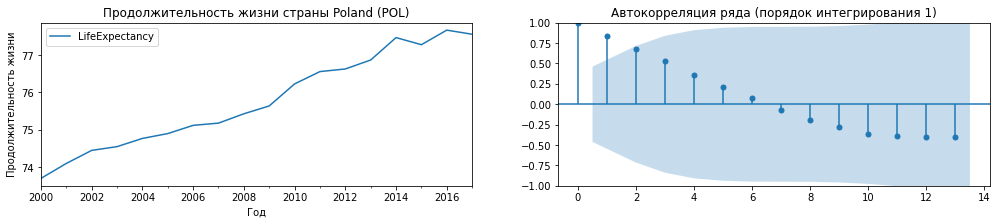

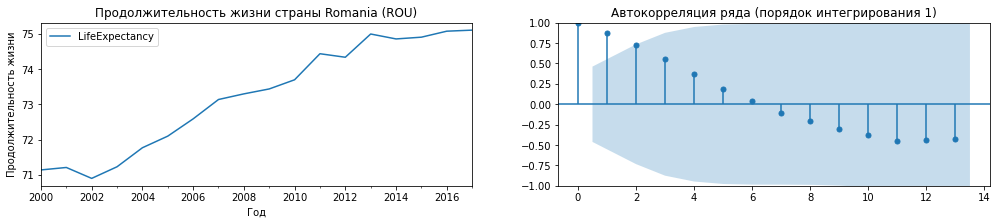

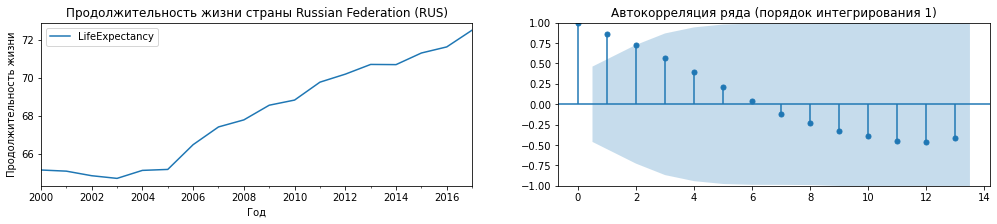

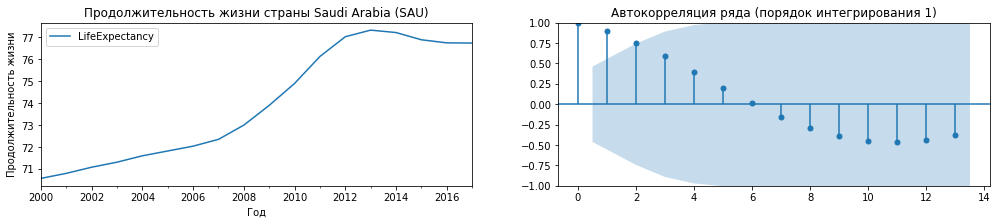

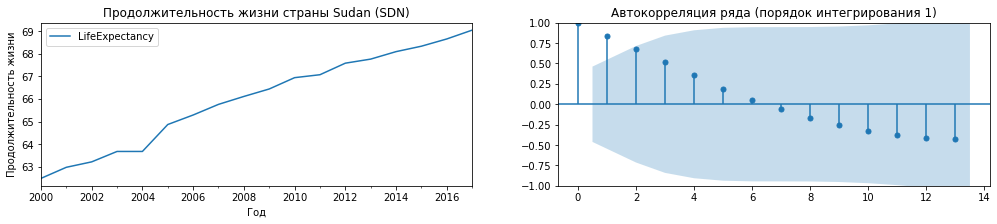

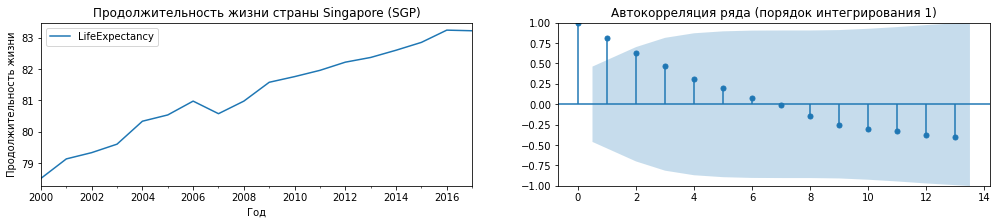

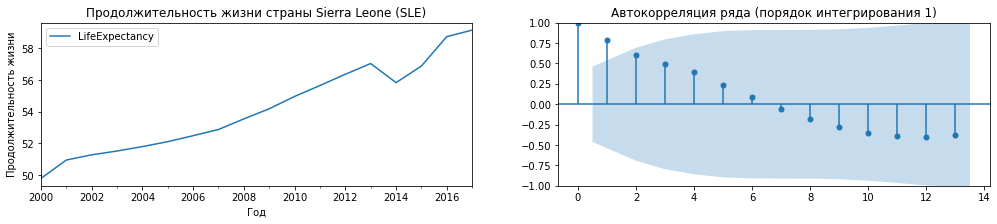

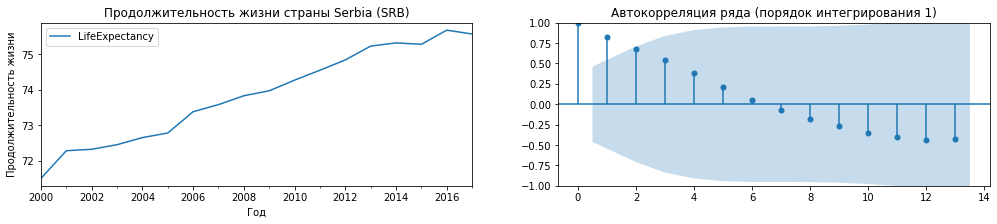

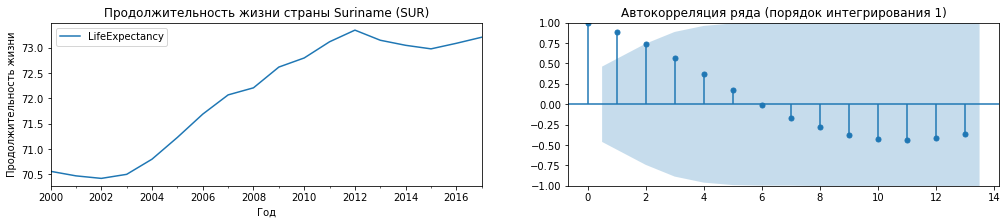

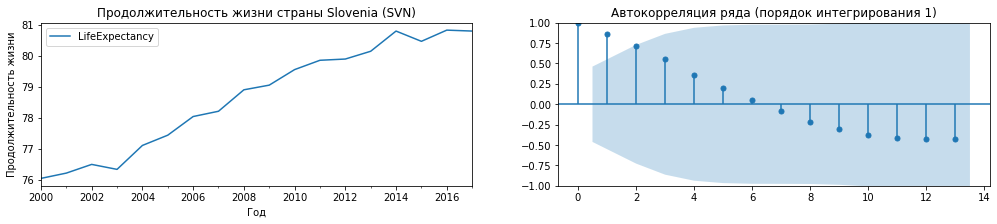

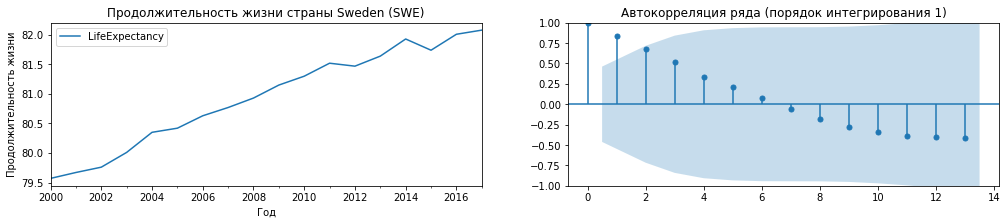

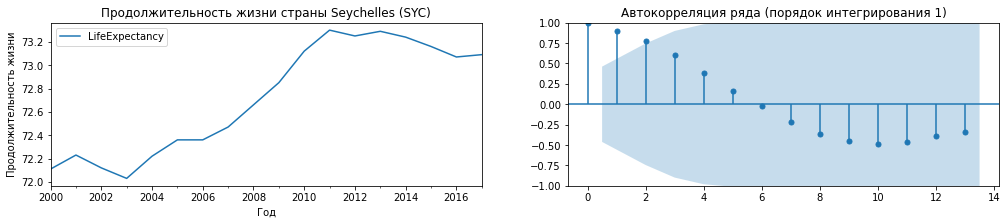

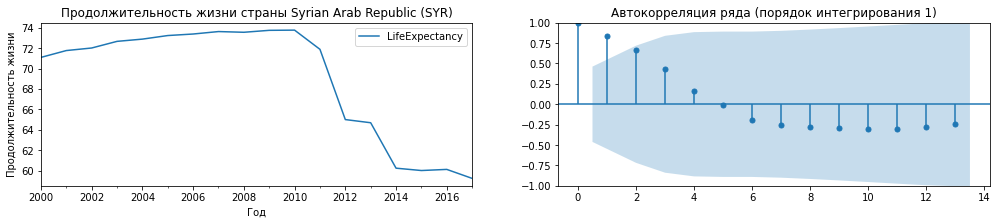

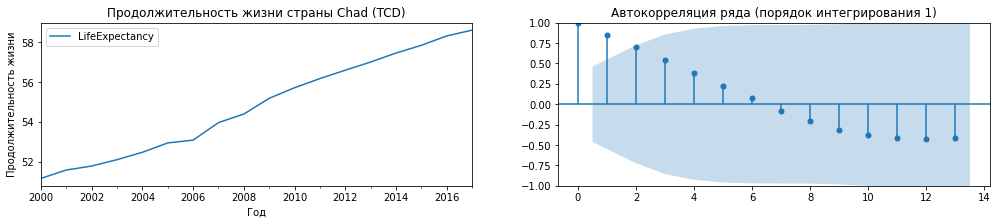

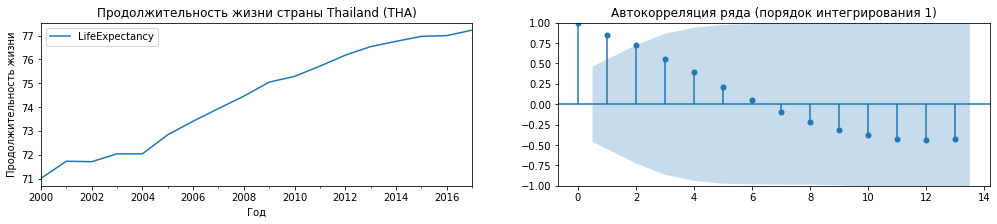

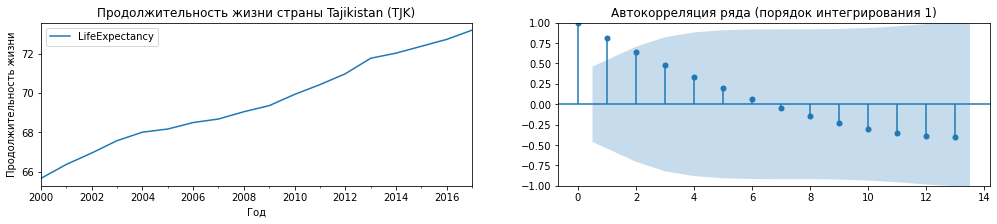

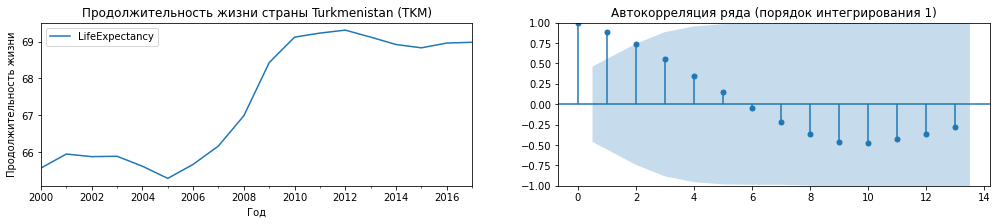

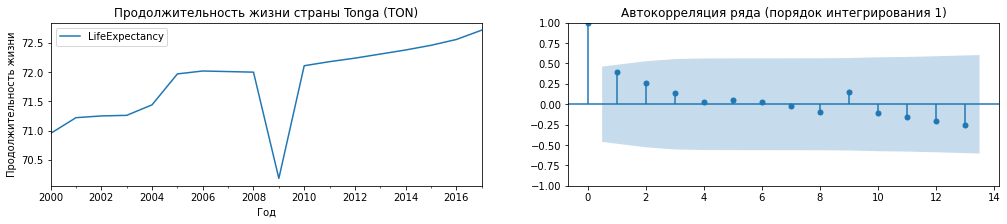

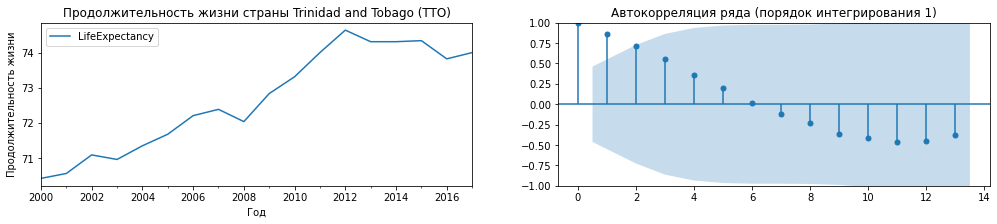

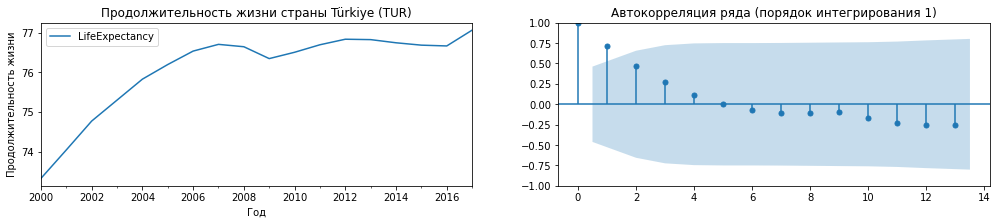

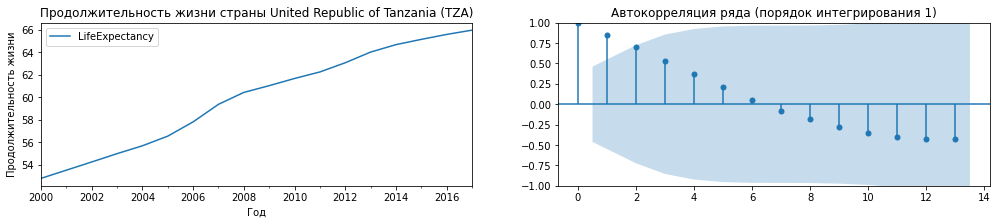

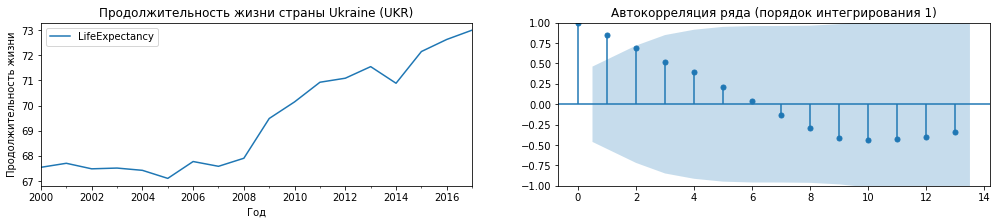

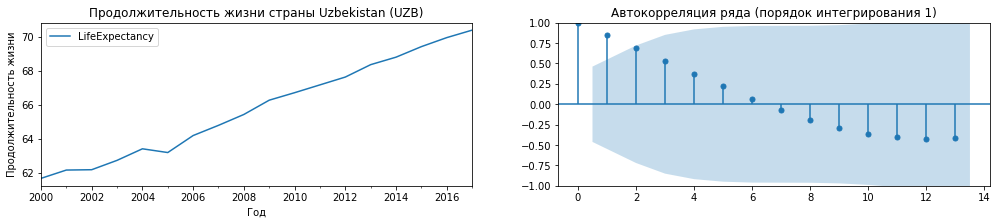

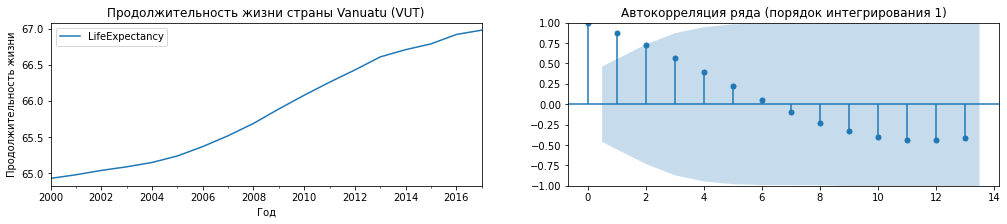

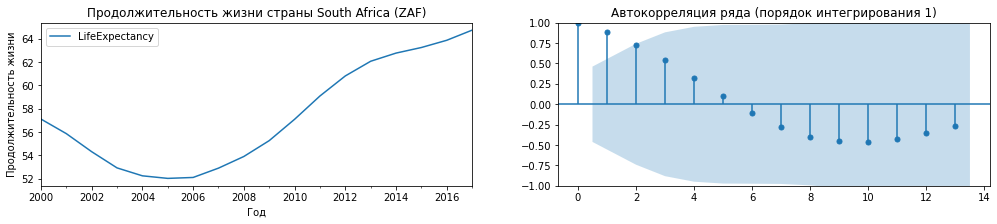

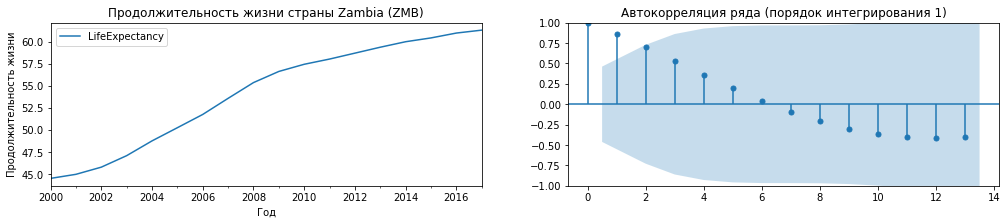

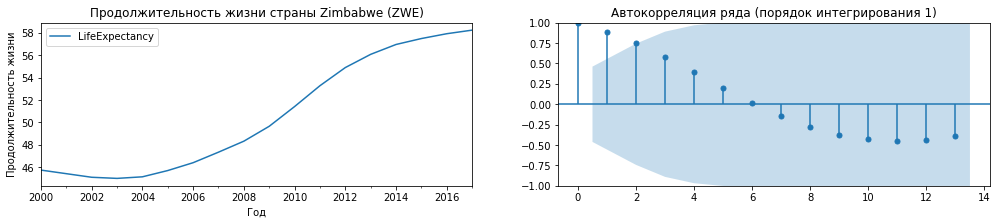

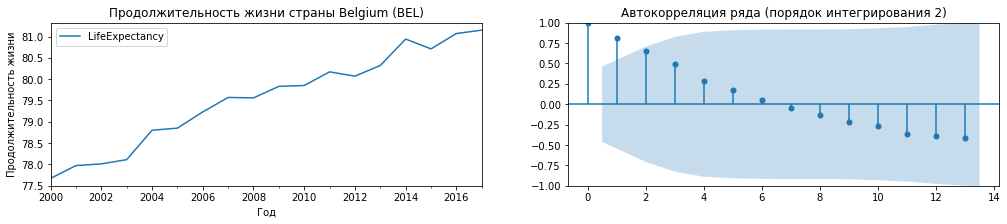

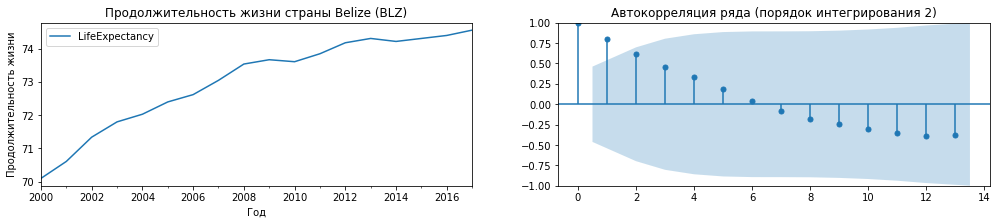

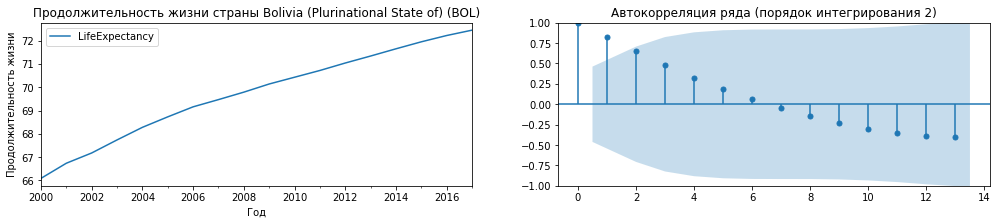

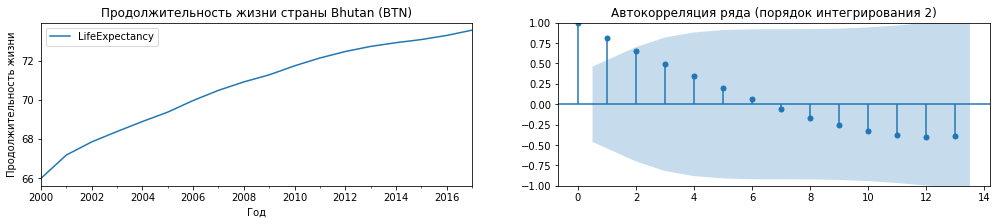

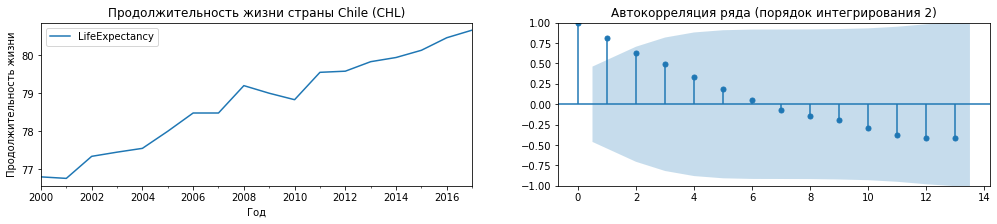

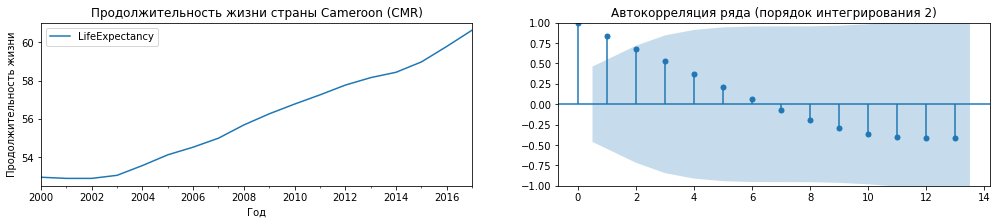

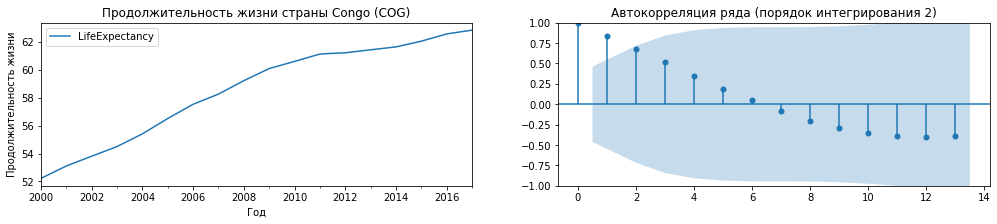

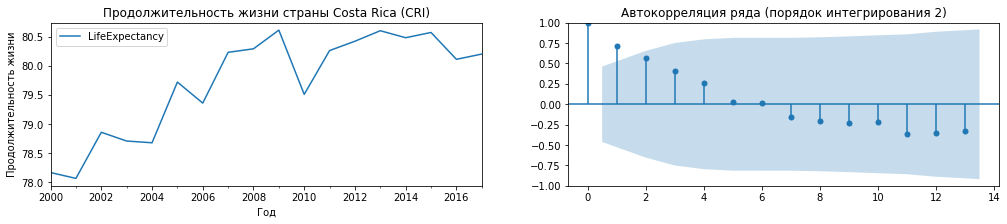

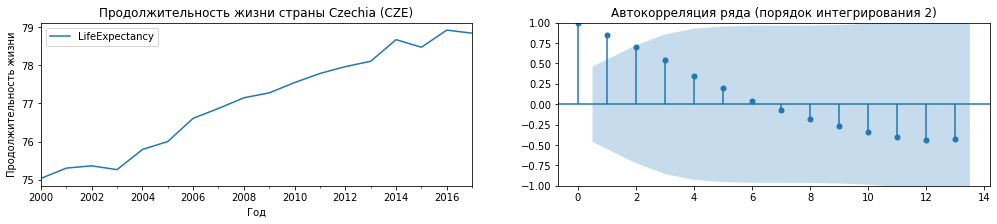

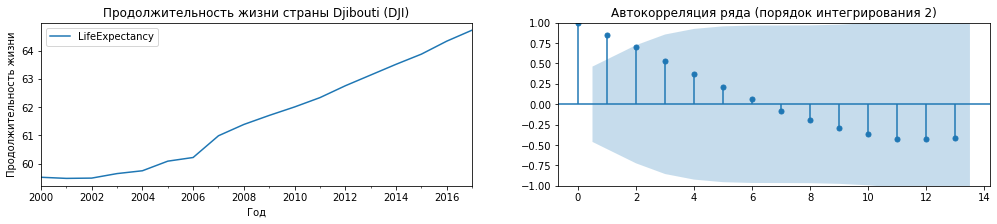

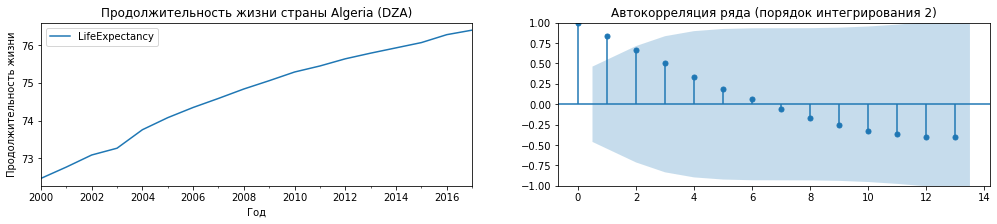

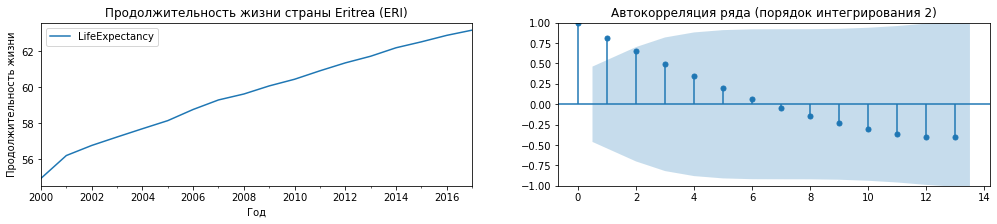

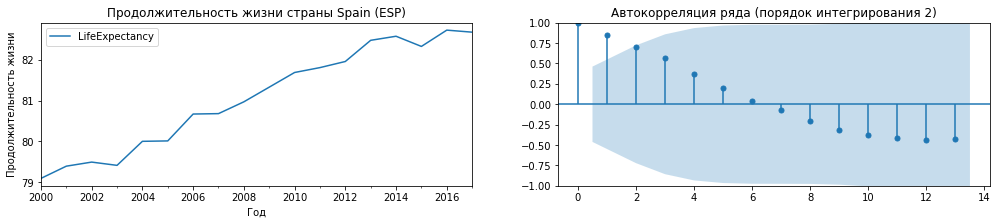

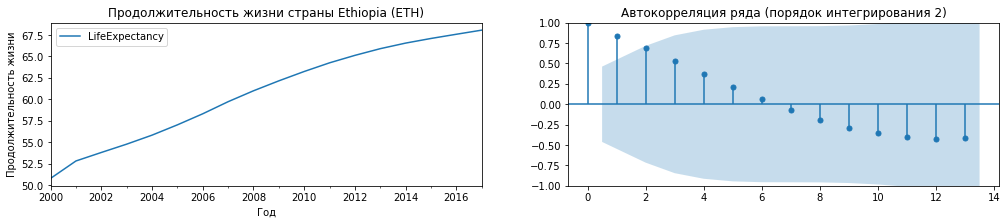

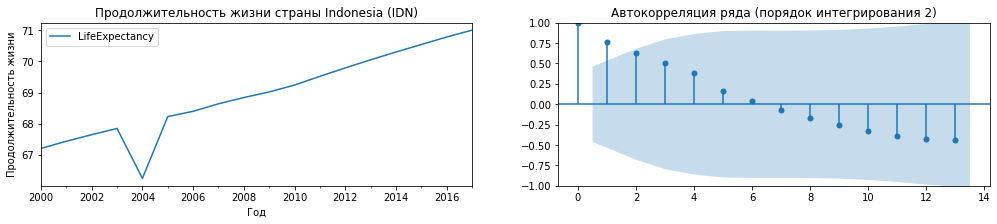

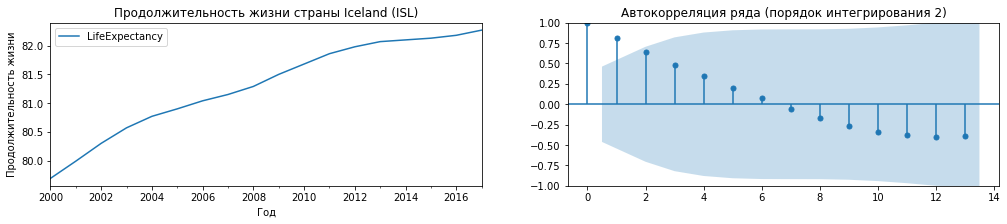

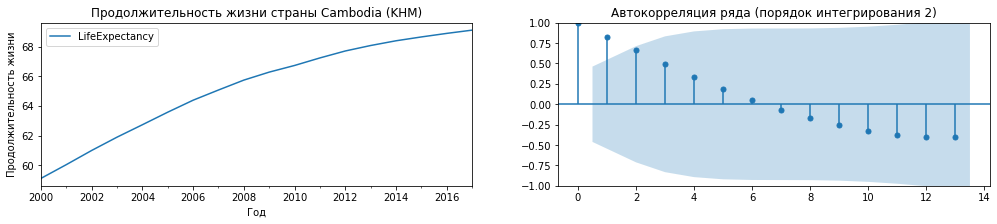

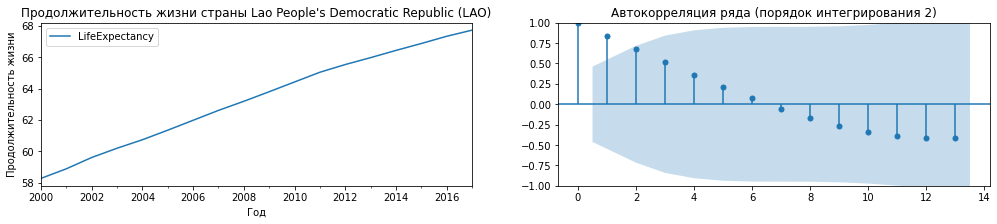

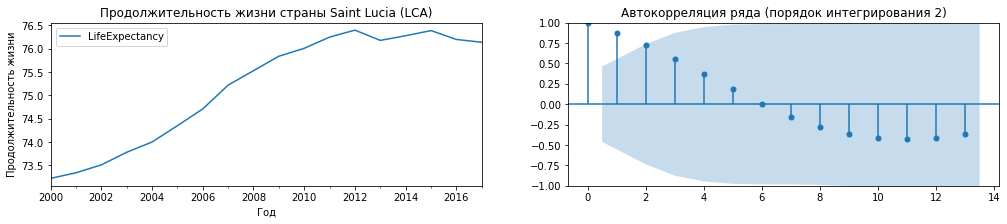

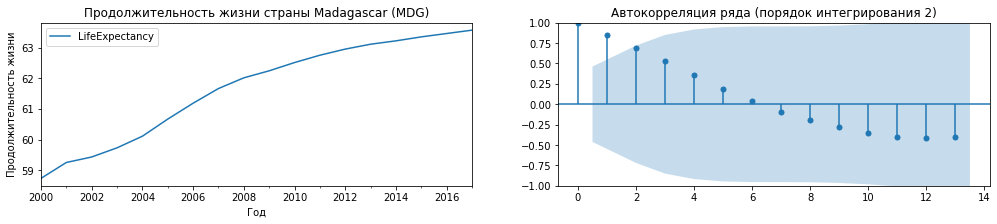

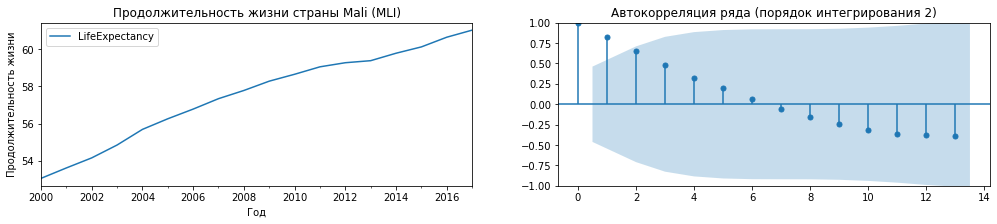

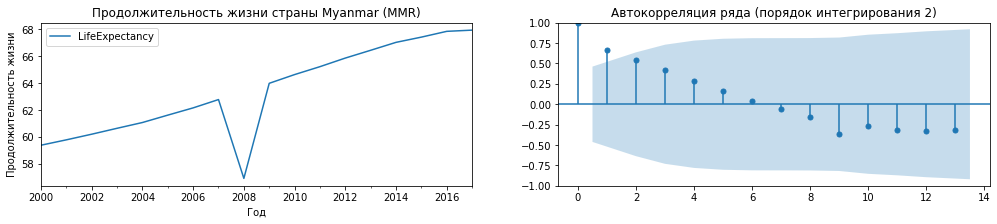

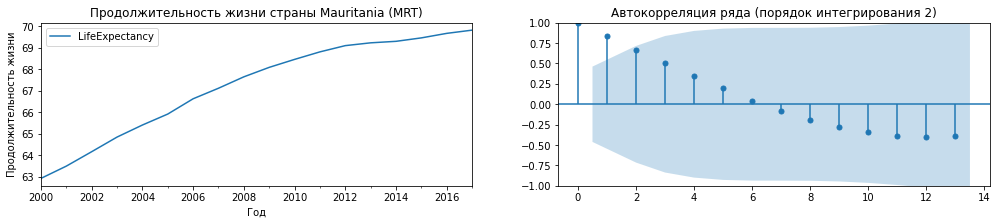

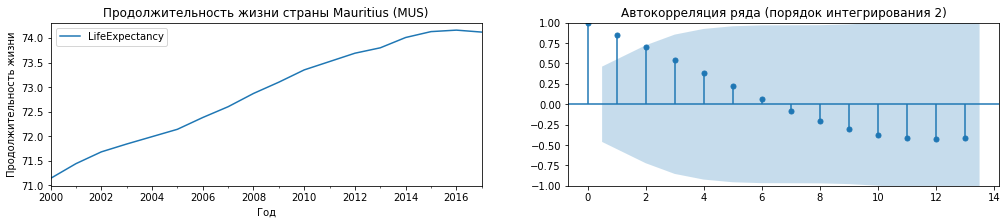

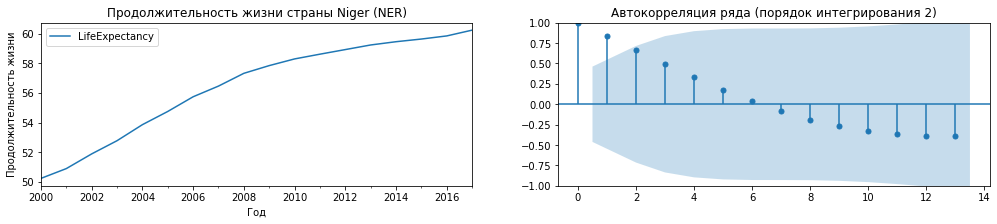

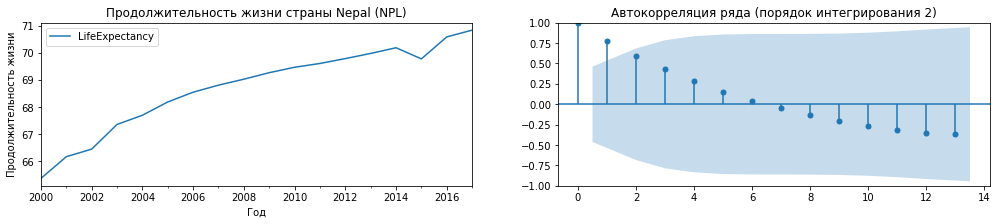

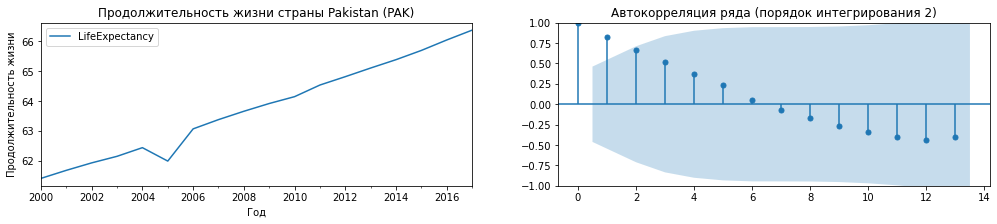

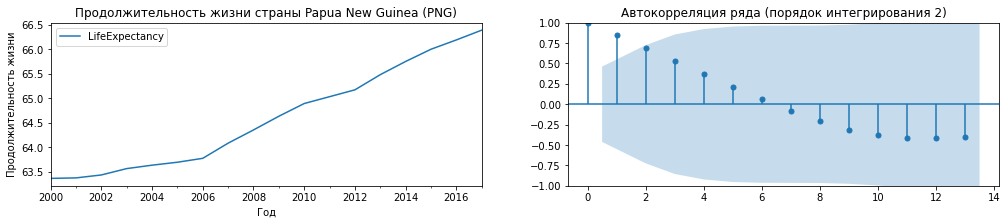

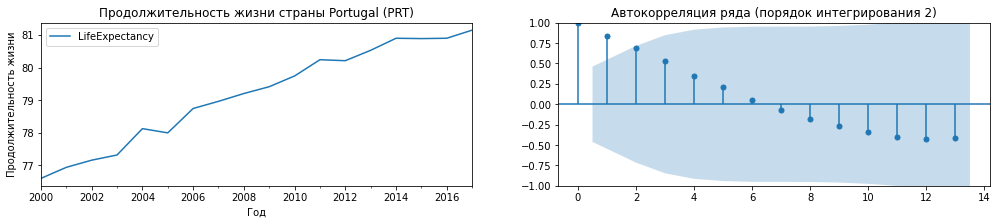

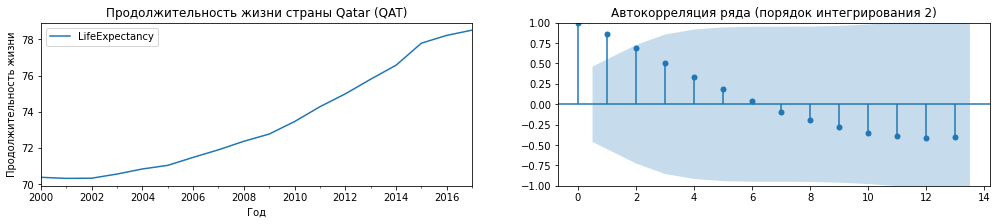

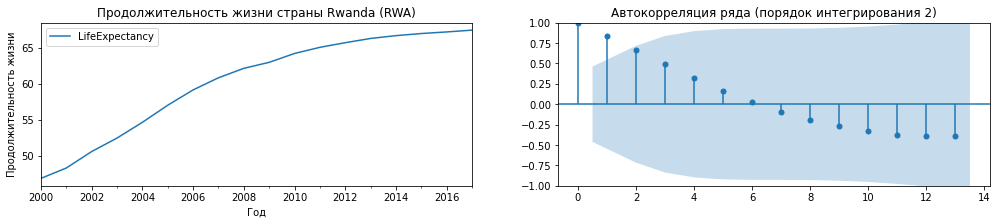

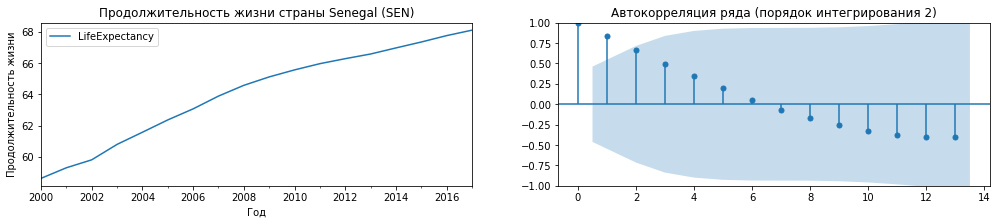

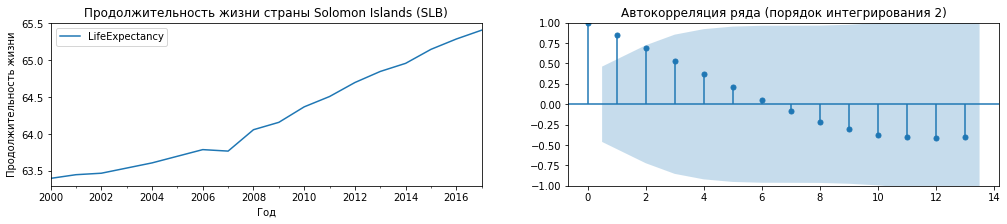

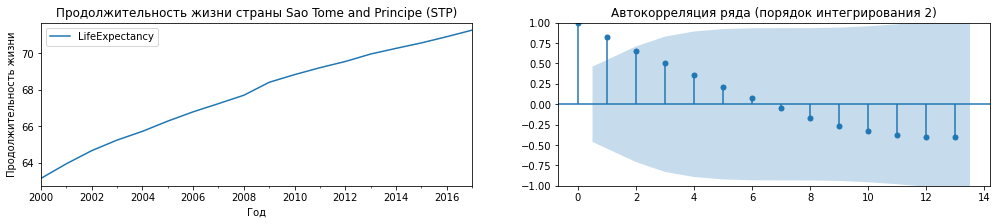

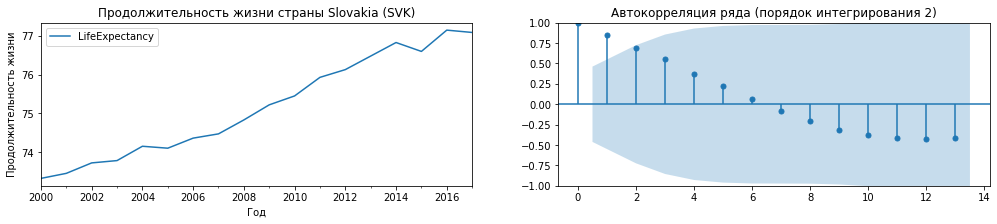

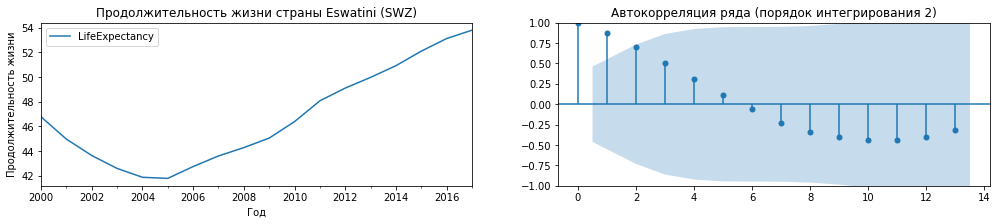

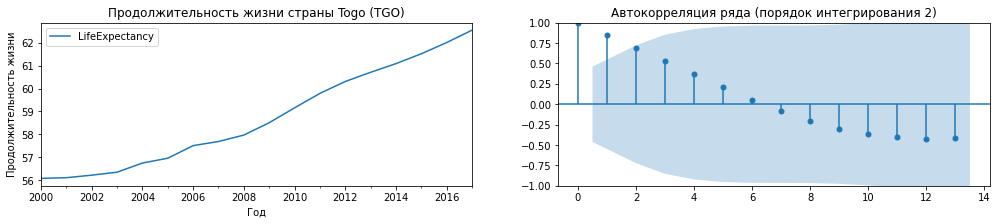

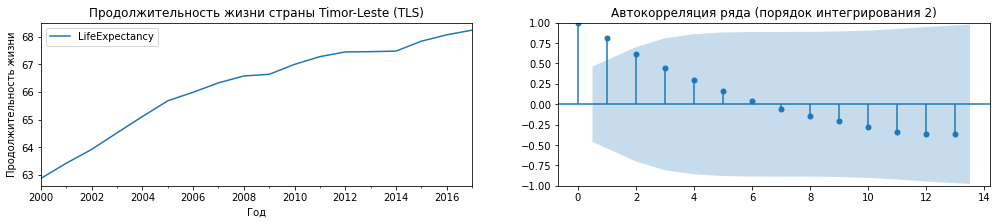

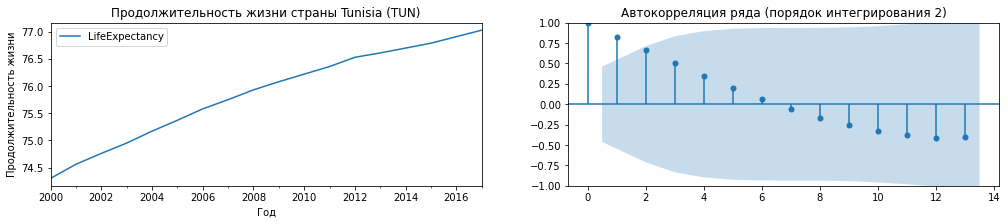

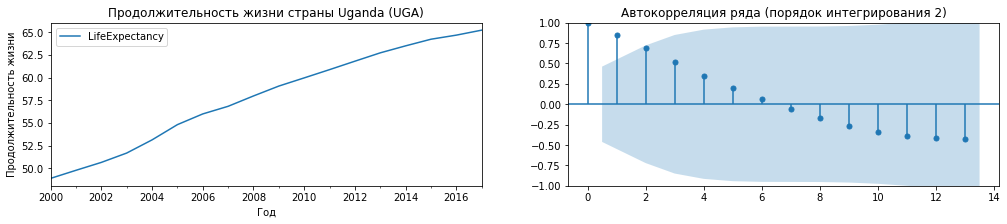

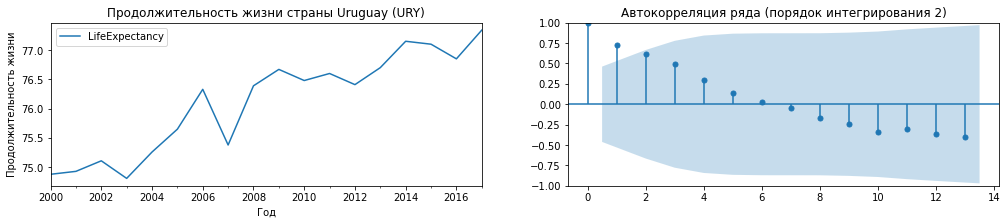

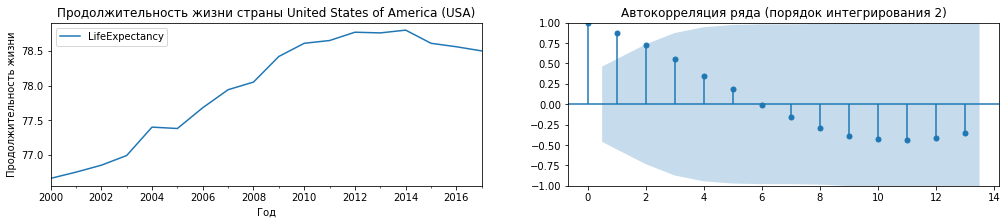

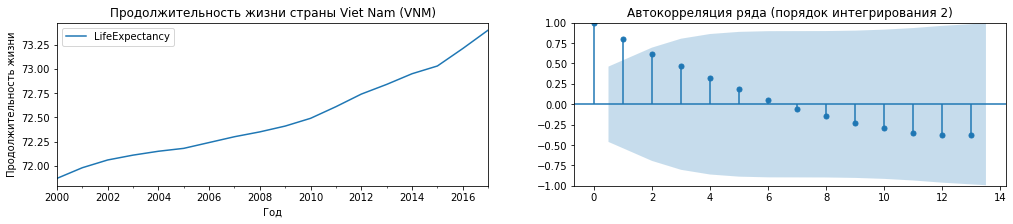

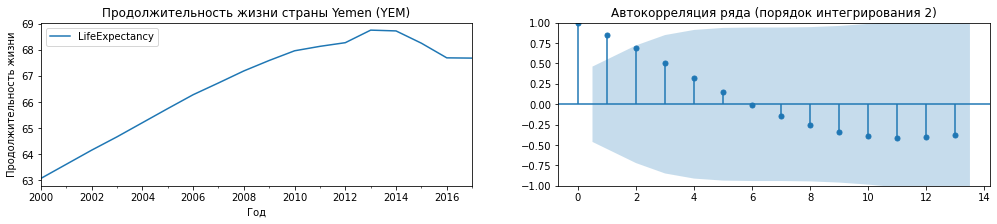

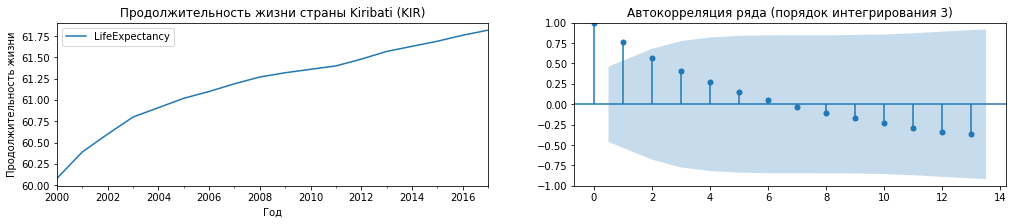

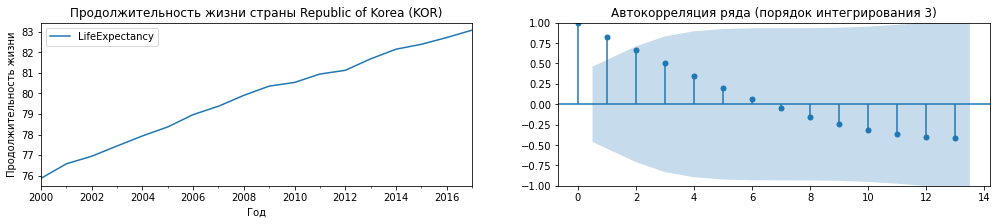

In [ ]:
# Выделим данные тренировочной части, 
# так как корректно исследовать их, а не всю выборку
train_data, test_data = get_train_test_data(data)

# Коды стран отсортируем по возрастанию порядка интегрирования ряда
location_codes = list(
    integration_order_data \
    .sort_values(by=['IntegrationOrder', F.SpatialDimValueCode.value]) \
    [F.SpatialDimValueCode.value].values
)

# Для каждой страны построим график автокорреляции
for code in location_codes:
    # Название страны
    location = get_location_by_code(code)
    # Порядок интегрирования ряда с ожидаемой продолжительностью жизни для данной страны
    integration_order = get_integration_order(code) 
    # Временной ряд для тренировочных данных
    location_time_series_train = get_location_time_series(train_data, code) 
    
    # Выводим графики исходгого ряда и его автокорреляции
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 3))
    location_time_series_train.plot(
        title=f'Продолжительность жизни страны {location} ({code})', 
        xlabel='Год',
        ylabel='Продолжительность жизни',
        ax=axs[0]
    )
    plot_acf(
        location_time_series_train, 
        title=f'Автокорреляция ряда (порядок интегрирования {integration_order})', 
        ax=axs[1],
    )

Видно, что для некоторых рядов, которые являются нестационарными \
(имеют порядок интегрирования 0 и идут в начале)\
не всегда наблюдается выделяющийся на фоне других лаг.\
Это говорит о том, что их значения не зависят от себя в прошлом.

В остальных же рядах, где порядок интегрирования больше 0,\
наибольшая корреляция для 1-го лага.\
Что говорит о том, что ряды имеют только тренд.

В некоторых странах наблюдаются скачки значений в определенные года.\
Часть из них связаны со стихийными бедствиями, эпидемиями или войнами.

Например, в Тонга [в 2009 г. было землятресение](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BB%D0%B5%D1%82%D1%80%D1%8F%D1%81%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%A2%D0%BE%D0%BD%D0%B3%D0%B5_(2009)). \
В Самоа тоже [было землятресение и цунами в 2009 г.](https://en.wikipedia.org/wiki/2009_Samoa_earthquake_and_tsunami)\
В Ливии [была гражданская война в 2011](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B6%D0%B4%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%B9%D0%BD%D0%B0_%D0%B2_%D0%9B%D0%B8%D0%B2%D0%B8%D0%B8_(2011)).\
На Гаити [в 2010 г. было землятресение](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BB%D0%B5%D1%82%D1%80%D1%8F%D1%81%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D0%93%D0%B0%D0%B8%D1%82%D0%B8_(2010)).

По остальным странам не так очевидны причины перепадов значений.